In [1]:
import pandas as pd

In [9]:
data = pd.read_csv(r"C:\Users\mucar\Desktop\Mustafa\Machine Learning - Data Science\Play Store Analyse Project\googleplaystore.csv")

In [10]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [12]:
data.columns = data.columns.str.replace(" ","_")

In [13]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [14]:
data.shape

(10841, 13)

In [18]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
Last_Updated       object
Current_Ver        object
Android_Ver        object
dtype: object

In [19]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

In [20]:
import seaborn as sns

<Axes: >

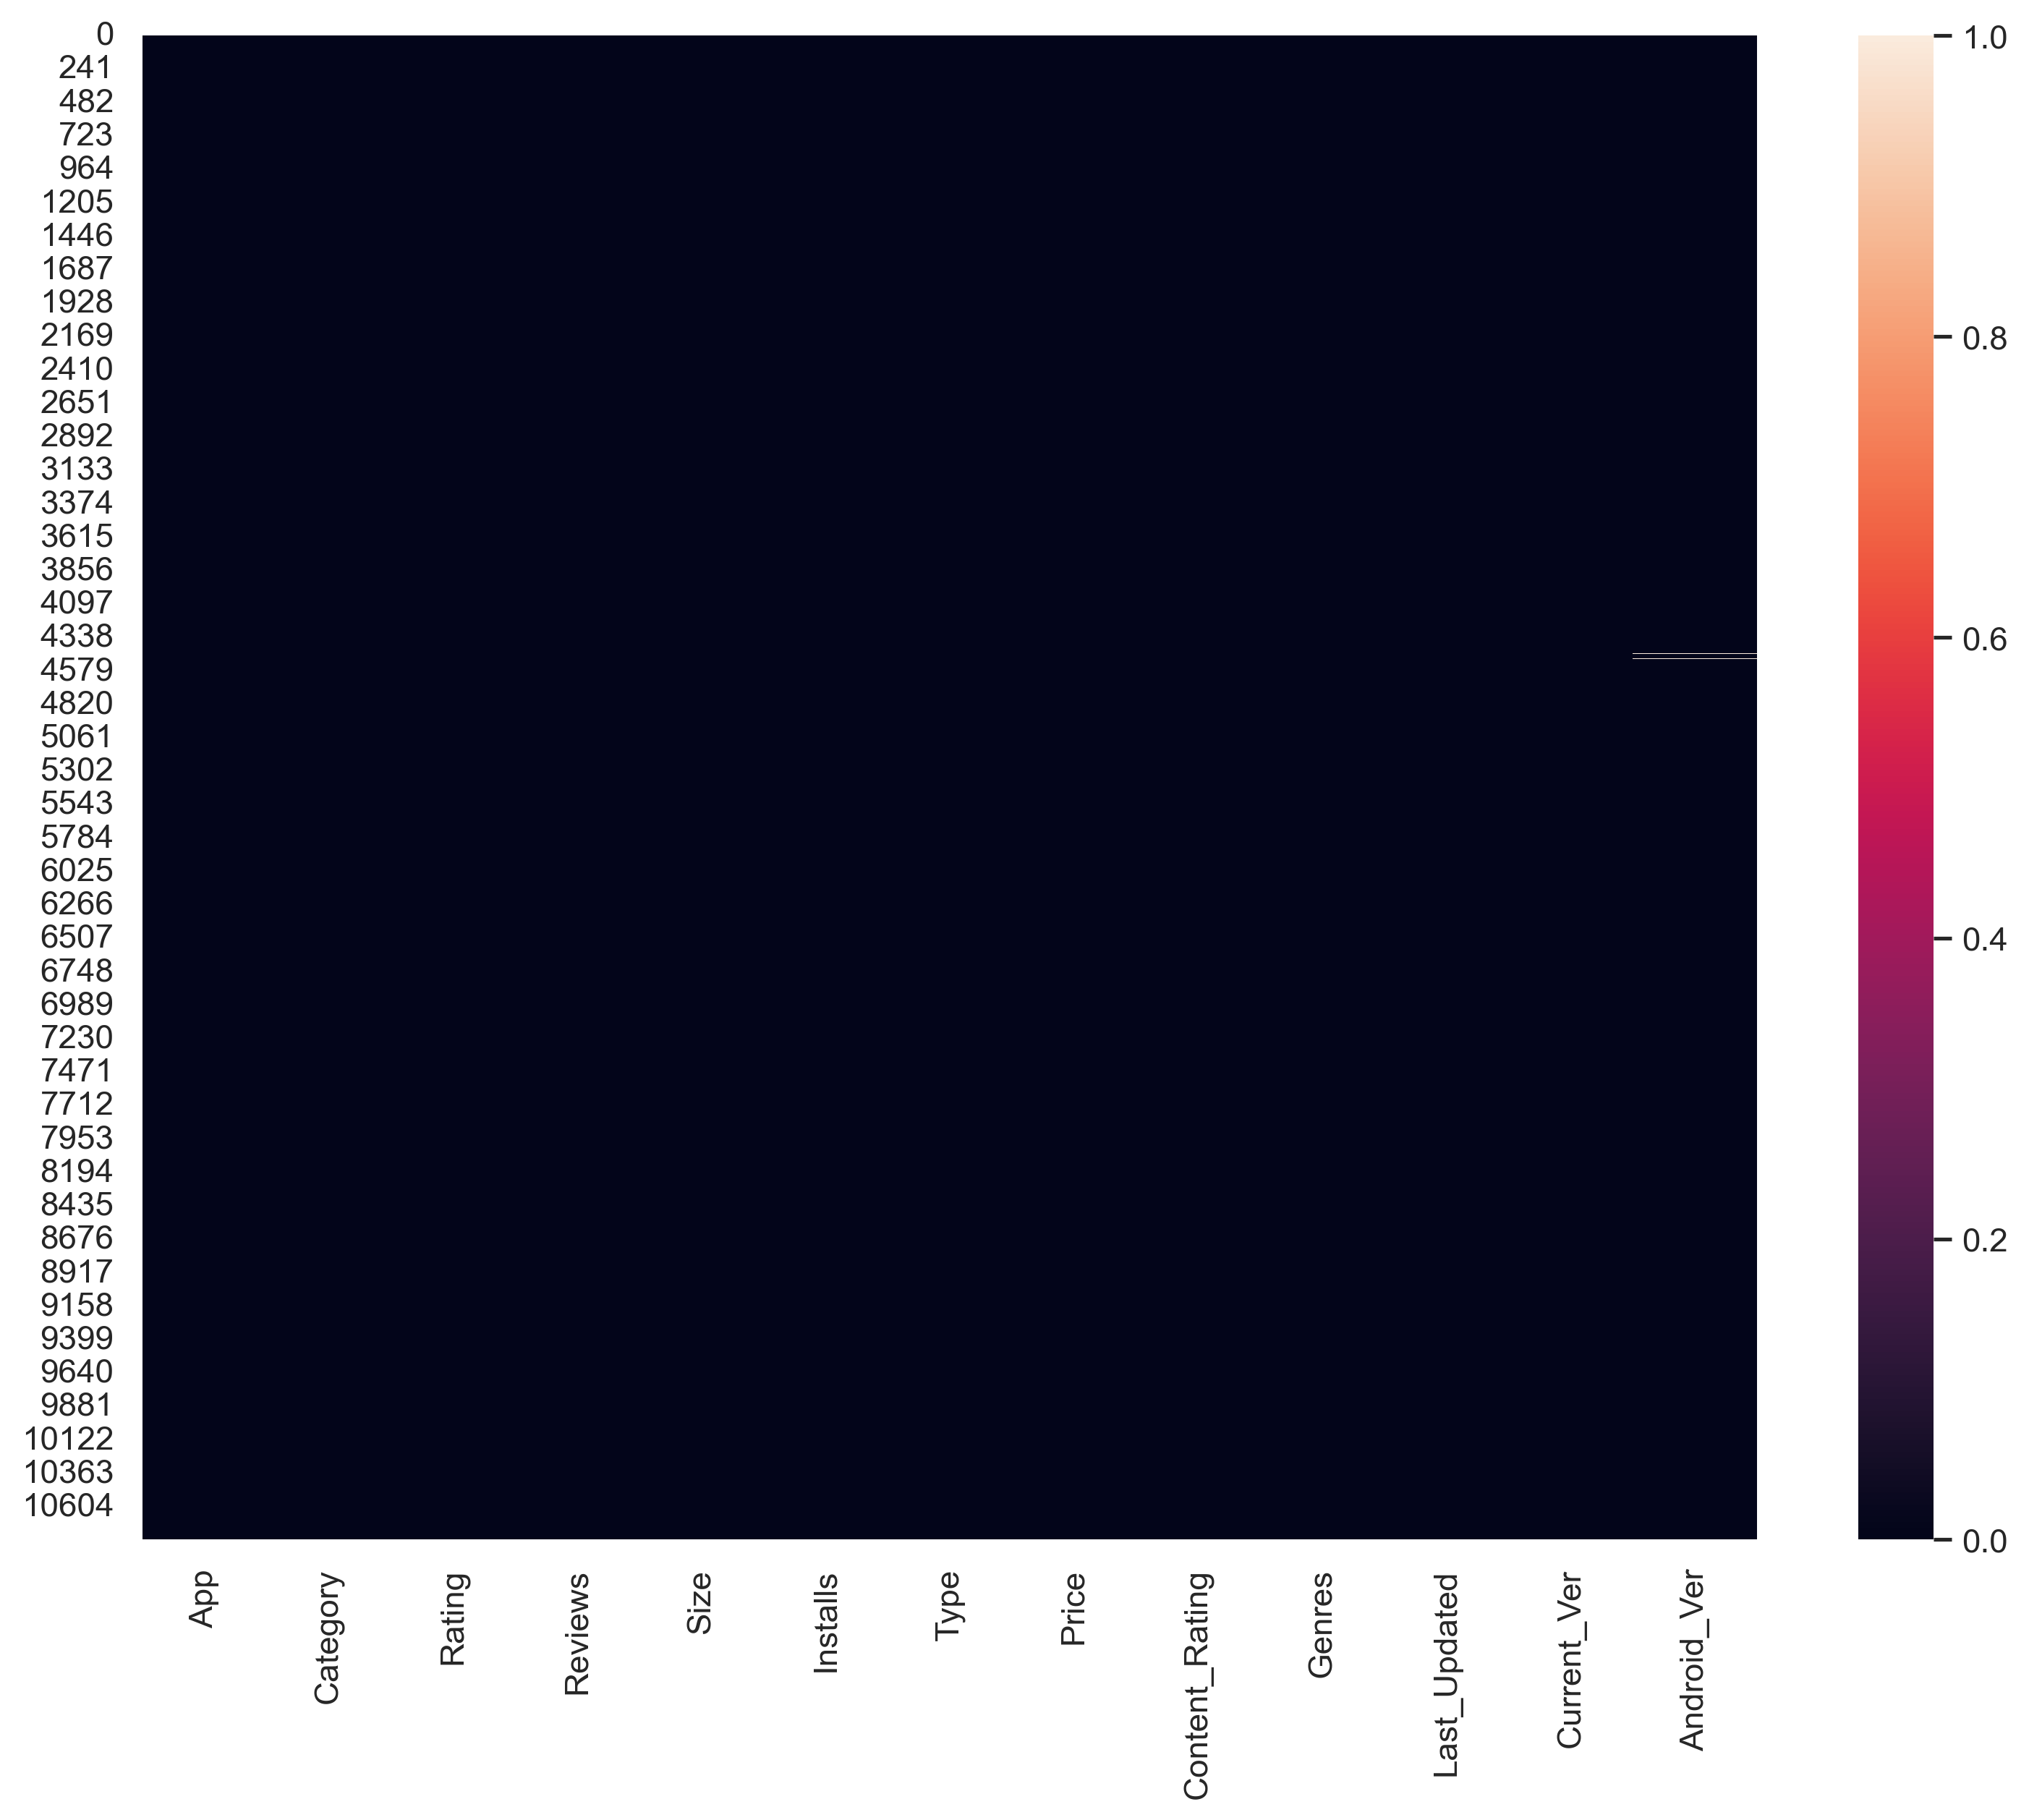

In [29]:
sns.set_theme()
sns.set(rc = {"figure.dpi" : 300 , "figure.figsize" : (12,9)})
sns.heatmap(data.isnull())

In [24]:
rating_median = data["Rating"].median()
rating_median

4.3

In [26]:
data["Rating"].fillna(rating_median , inplace = True)

In [30]:
data.dropna(inplace = True)

In [32]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

In [35]:
data["Reviews"].describe()

count     10829
unique     5999
top           0
freq        594
Name: Reviews, dtype: object

In [36]:
data["Reviews"] = data["Reviews"].astype("int64")

In [38]:
data["Reviews"].describe().round()

count       10829.0
mean       444602.0
std       2929213.0
min             0.0
25%            38.0
50%          2100.0
75%         54815.0
max      78158306.0
Name: Reviews, dtype: float64

In [41]:
print(len(data["Size"].unique()))
data["Size"].unique()

457


array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [48]:
data["Size"].replace("k","",regex=True,inplace=True)
data["Size"].replace("M","",regex=True,inplace=True)

In [49]:
data["Size"].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '5.5', '17', '39', '31', '4.2', '7.0',
       '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24',
       'Varies with device', '9.4', '15', '10', '1.2', '26', '8.0', '7.9',
       '56', '57', '35', '54', '201', '3.6', '5.7', '8.6', '2.4', '27',
       '2.7', '2.5', '16', '3.4', '8.9', '3.9', '2.9', '38', '32', '5.4',
       '18', '1.1', '2.2', '4.5', '9.8', '52', '9.0', '6.7', '30', '2.6',
       '7.1', '3.7', '22', '7.4', '6.4', '3.2', '8.2', '9.9', '4.9',
       '9.5', '5.0', '5.9', '13', '73', '6.8', '3.5', '4.0', '2.3', '7.2',
       '2.1', '42', '7.3', '9.1', '55', '6.5', '1.5', '7.5', '51', '41',
       '48', '8.5', '46', '8.3', '4.3', '4.7', '3.3', '40', '7.8', '8.8',
       '6.6', '5.1', '61', '66', '79', '8.4', '118', '44', '695', '1.6',
       '6.2', '53', '1.4', '3.0', '5.8', '3.8', '9.6', '45', '63', '49',
       '77', '4.4', '4.8', '70', '6.9', '9.3', '10.0', '8.1', '36',

In [57]:
size_median = data[data["Size"]!="Varies with device"]["Size"].astype(float).median()
size_median

15.0

In [58]:
data["Size"].replace("Varies with device",15.0,regex=True,inplace=True)

In [59]:
data["Size"].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '5.5', '17', '39', '31', '4.2', '7.0',
       '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24', 15.0, '9.4',
       '15', '10', '1.2', '26', '8.0', '7.9', '56', '57', '35', '54',
       '201', '3.6', '5.7', '8.6', '2.4', '27', '2.7', '2.5', '16', '3.4',
       '8.9', '3.9', '2.9', '38', '32', '5.4', '18', '1.1', '2.2', '4.5',
       '9.8', '52', '9.0', '6.7', '30', '2.6', '7.1', '3.7', '22', '7.4',
       '6.4', '3.2', '8.2', '9.9', '4.9', '9.5', '5.0', '5.9', '13', '73',
       '6.8', '3.5', '4.0', '2.3', '7.2', '2.1', '42', '7.3', '9.1', '55',
       '6.5', '1.5', '7.5', '51', '41', '48', '8.5', '46', '8.3', '4.3',
       '4.7', '3.3', '40', '7.8', '8.8', '6.6', '5.1', '61', '66', '79',
       '8.4', '118', '44', '695', '1.6', '6.2', '53', '1.4', '3.0', '5.8',
       '3.8', '9.6', '45', '63', '49', '77', '4.4', '4.8', '70', '6.9',
       '9.3', '10.0', '8.1', '36', '84', '97', '2.

In [60]:
data.Size = pd.to_numeric(data.Size)

In [61]:
data.Size.head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64

In [64]:
data.Size.describe().round()

count    10829.0
mean        34.0
std         91.0
min          1.0
25%          7.0
50%         15.0
75%         28.0
max       1020.0
Name: Size, dtype: float64

In [65]:
data.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [68]:
data.Installs = data.Installs.apply(lambda x:x.replace(",",""))
data.Installs = data.Installs.apply(lambda x:x.replace("+",""))
data.Installs = data.Installs.apply(lambda x:int(x))

In [69]:
data.Installs.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

In [71]:
data.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [78]:
data.Price = data.Price.apply(lambda x:x.replace("$",""))
data.Price = data.Price.apply(lambda x:float(x))

In [79]:
data.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [80]:
data.Genres.head()

0                 Art & Design
1    Art & Design;Pretend Play
2                 Art & Design
3                 Art & Design
4      Art & Design;Creativity
Name: Genres, dtype: object

In [83]:
data.Genres = data.Genres.str.split(";").str[0]

In [84]:
data.Genres.head()

0                 Art & Design
1    Art & Design Pretend Play
2                 Art & Design
3                 Art & Design
4      Art & Design Creativity
Name: Genres, dtype: object

In [85]:
data.Genres.unique()

array(['Art & Design', 'Art & Design Pretend Play',
       'Art & Design Creativity', 'Art & Design Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics Creativity', 'Communication', 'Dating',
       'Education Education', 'Education', 'Education Creativity',
       'Education Music & Video', 'Education Action & Adventure',
       'Education Pretend Play', 'Education Brain Games', 'Entertainment',
       'Entertainment Music & Video', 'Entertainment Brain Games',
       'Entertainment Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle Pretend Play',
       'Adventure Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual Creativity',
       'Casual Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [90]:
data.Genres.value_counts()

Tools                                840
Entertainment                        622
Education                            548
Medical                              463
Business                             460
                                    ... 
Parenting Brain Games                  1
Travel & Local Action & Adventure      1
Lifestyle Pretend Play                 1
Tools Education                        1
Strategy Creativity                    1
Name: Genres, Length: 119, dtype: int64

In [92]:
data.Genres.replace("Music & Audio","Music",inplace = True , regex = True)

In [98]:
data.Genres.value_counts()

Tools                                840
Entertainment                        622
Education                            548
Medical                              463
Business                             460
                                    ... 
Lifestyle Pretend Play                 1
Travel & Local Action & Adventure      1
Card Brain Games                       1
Board Pretend Play                     1
Strategy Creativity                    1
Name: Genres, Length: 118, dtype: int64

In [99]:
data.Last_Updated.head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last_Updated, dtype: object

In [103]:
data.Last_Updated = pd.to_datetime(data.Last_Updated)

In [104]:
data.Last_Updated.head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last_Updated, dtype: datetime64[ns]

In [105]:
data.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                     float64
Installs                   int64
Type                      object
Price                    float64
Content_Rating            object
Genres                    object
Last_Updated      datetime64[ns]
Current_Ver               object
Android_Ver               object
dtype: object

<Axes: >

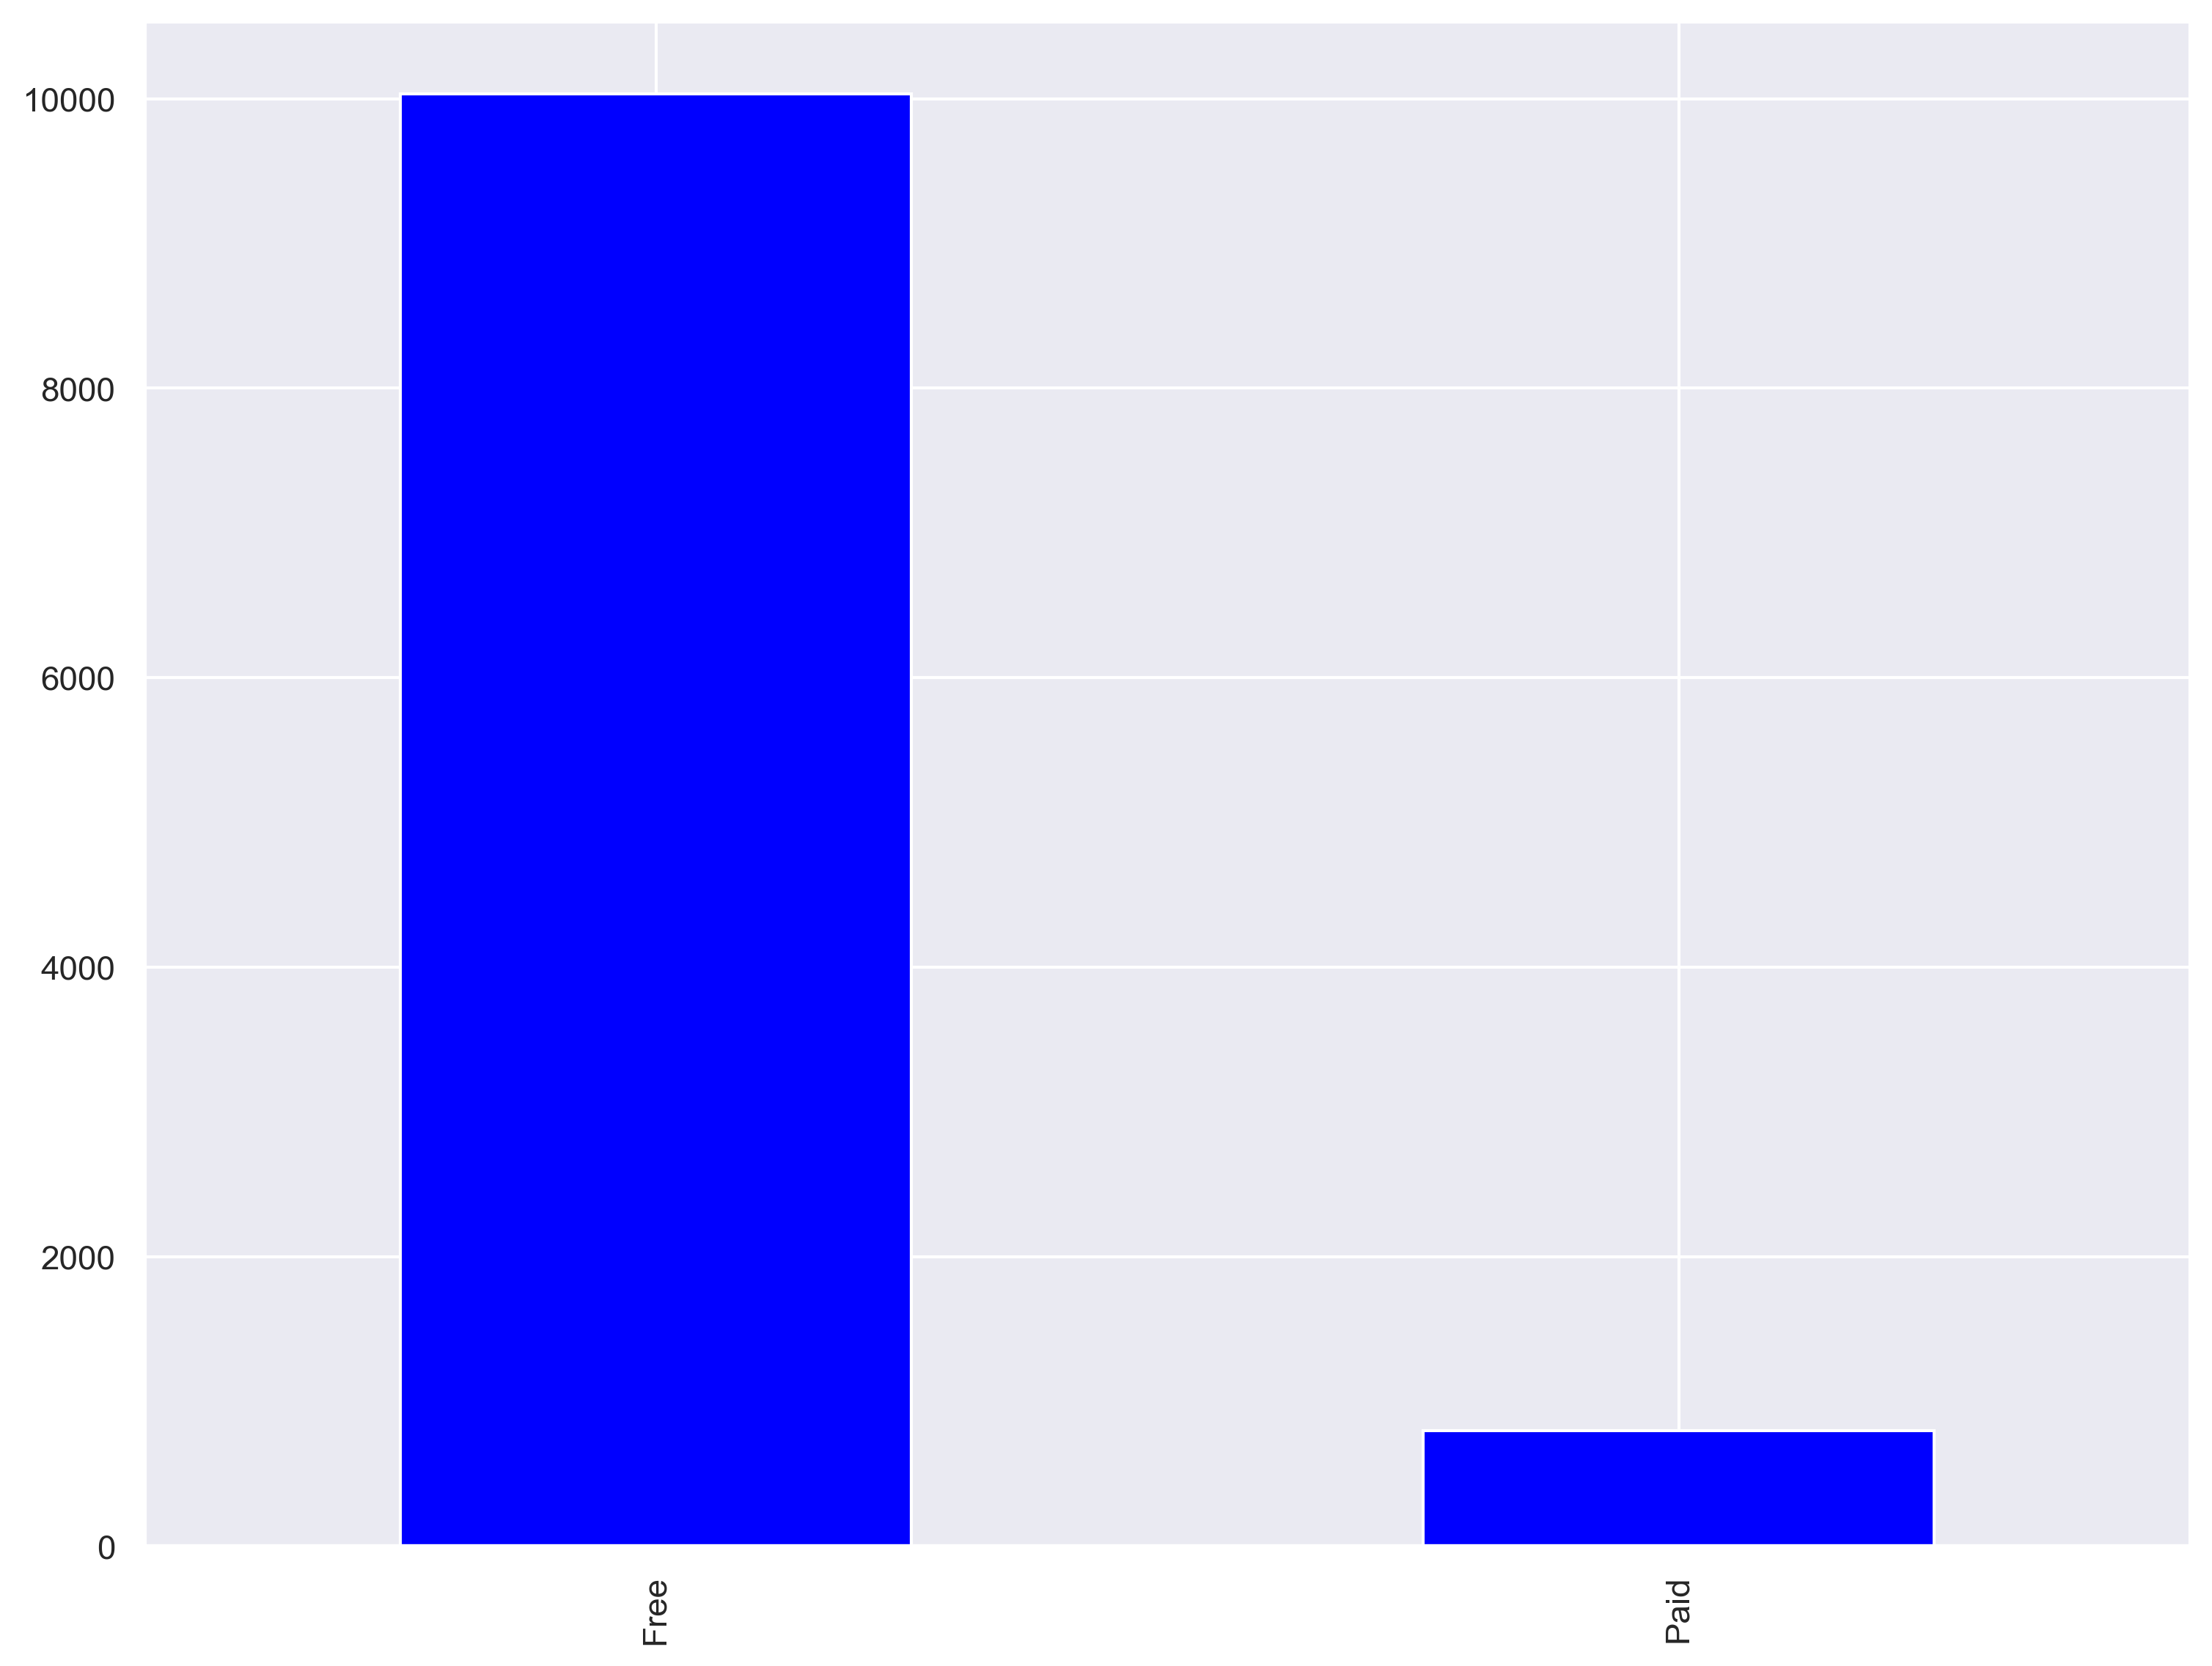

In [107]:
data.Type.value_counts().plot(kind="bar",color = "blue")

<Axes: xlabel='Type', ylabel='Rating'>

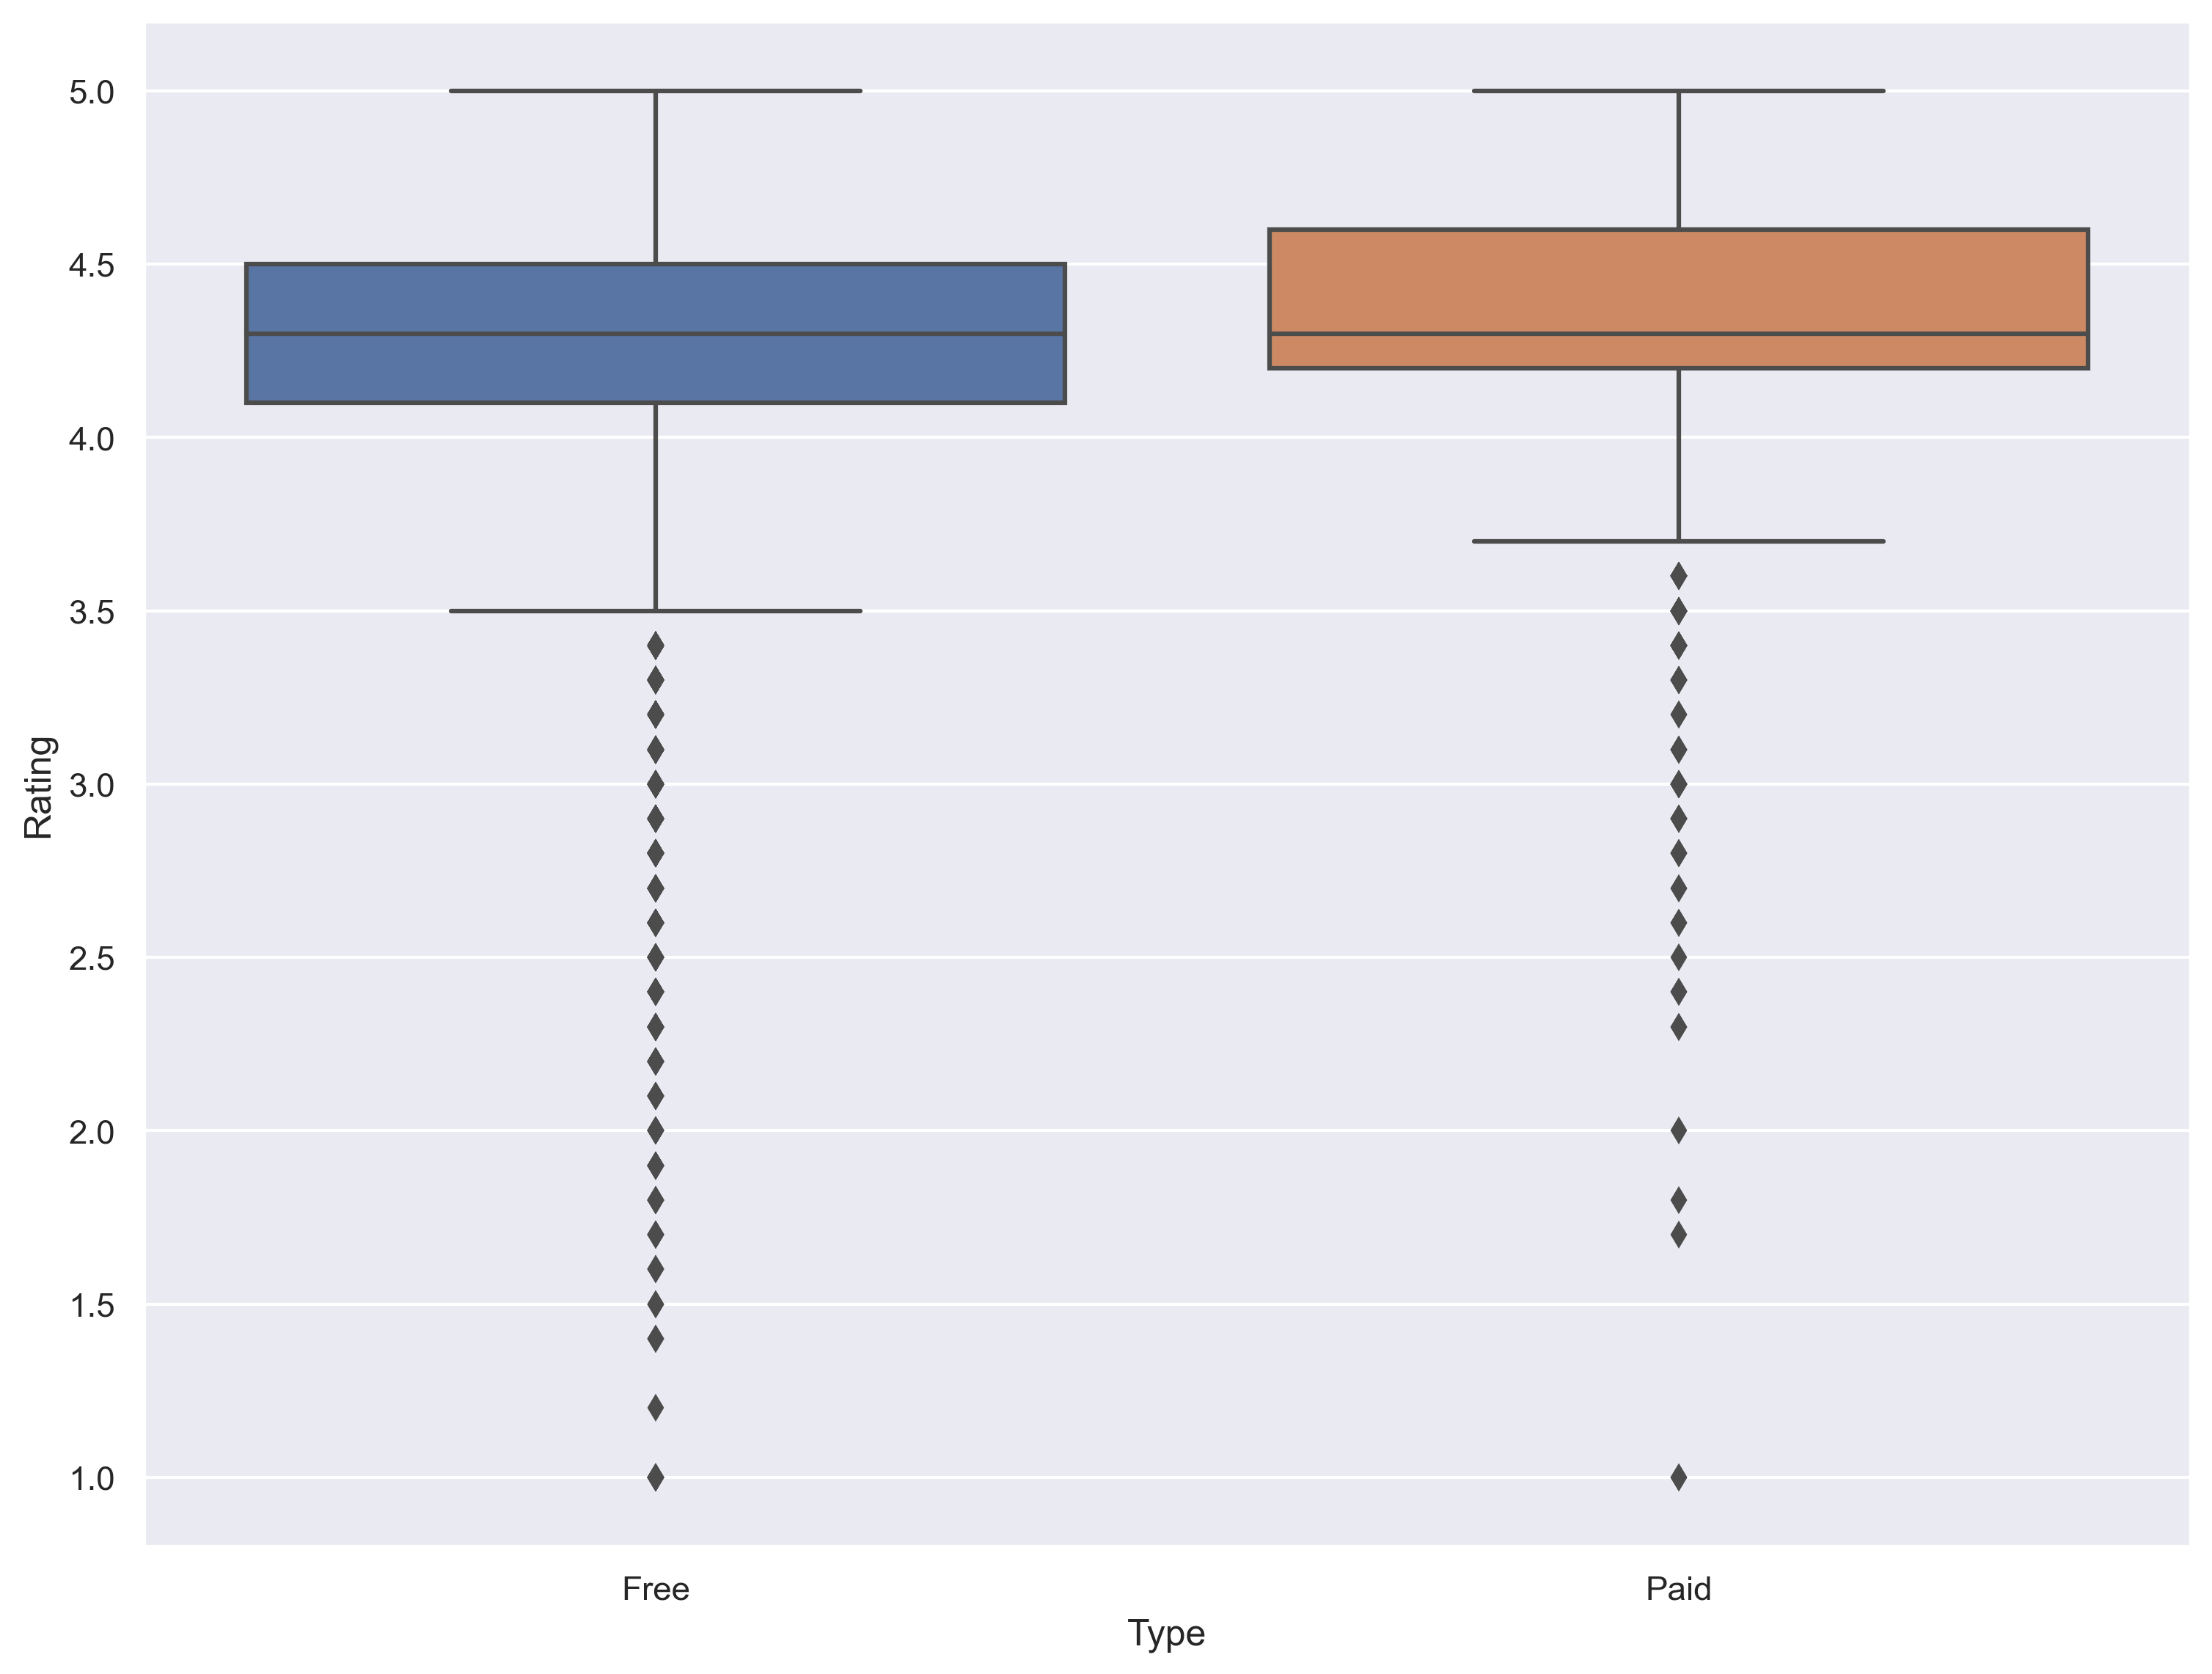

In [110]:
sns.boxplot(x = "Type", y = "Rating" , data=data)

In [113]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Content rating with their counts')

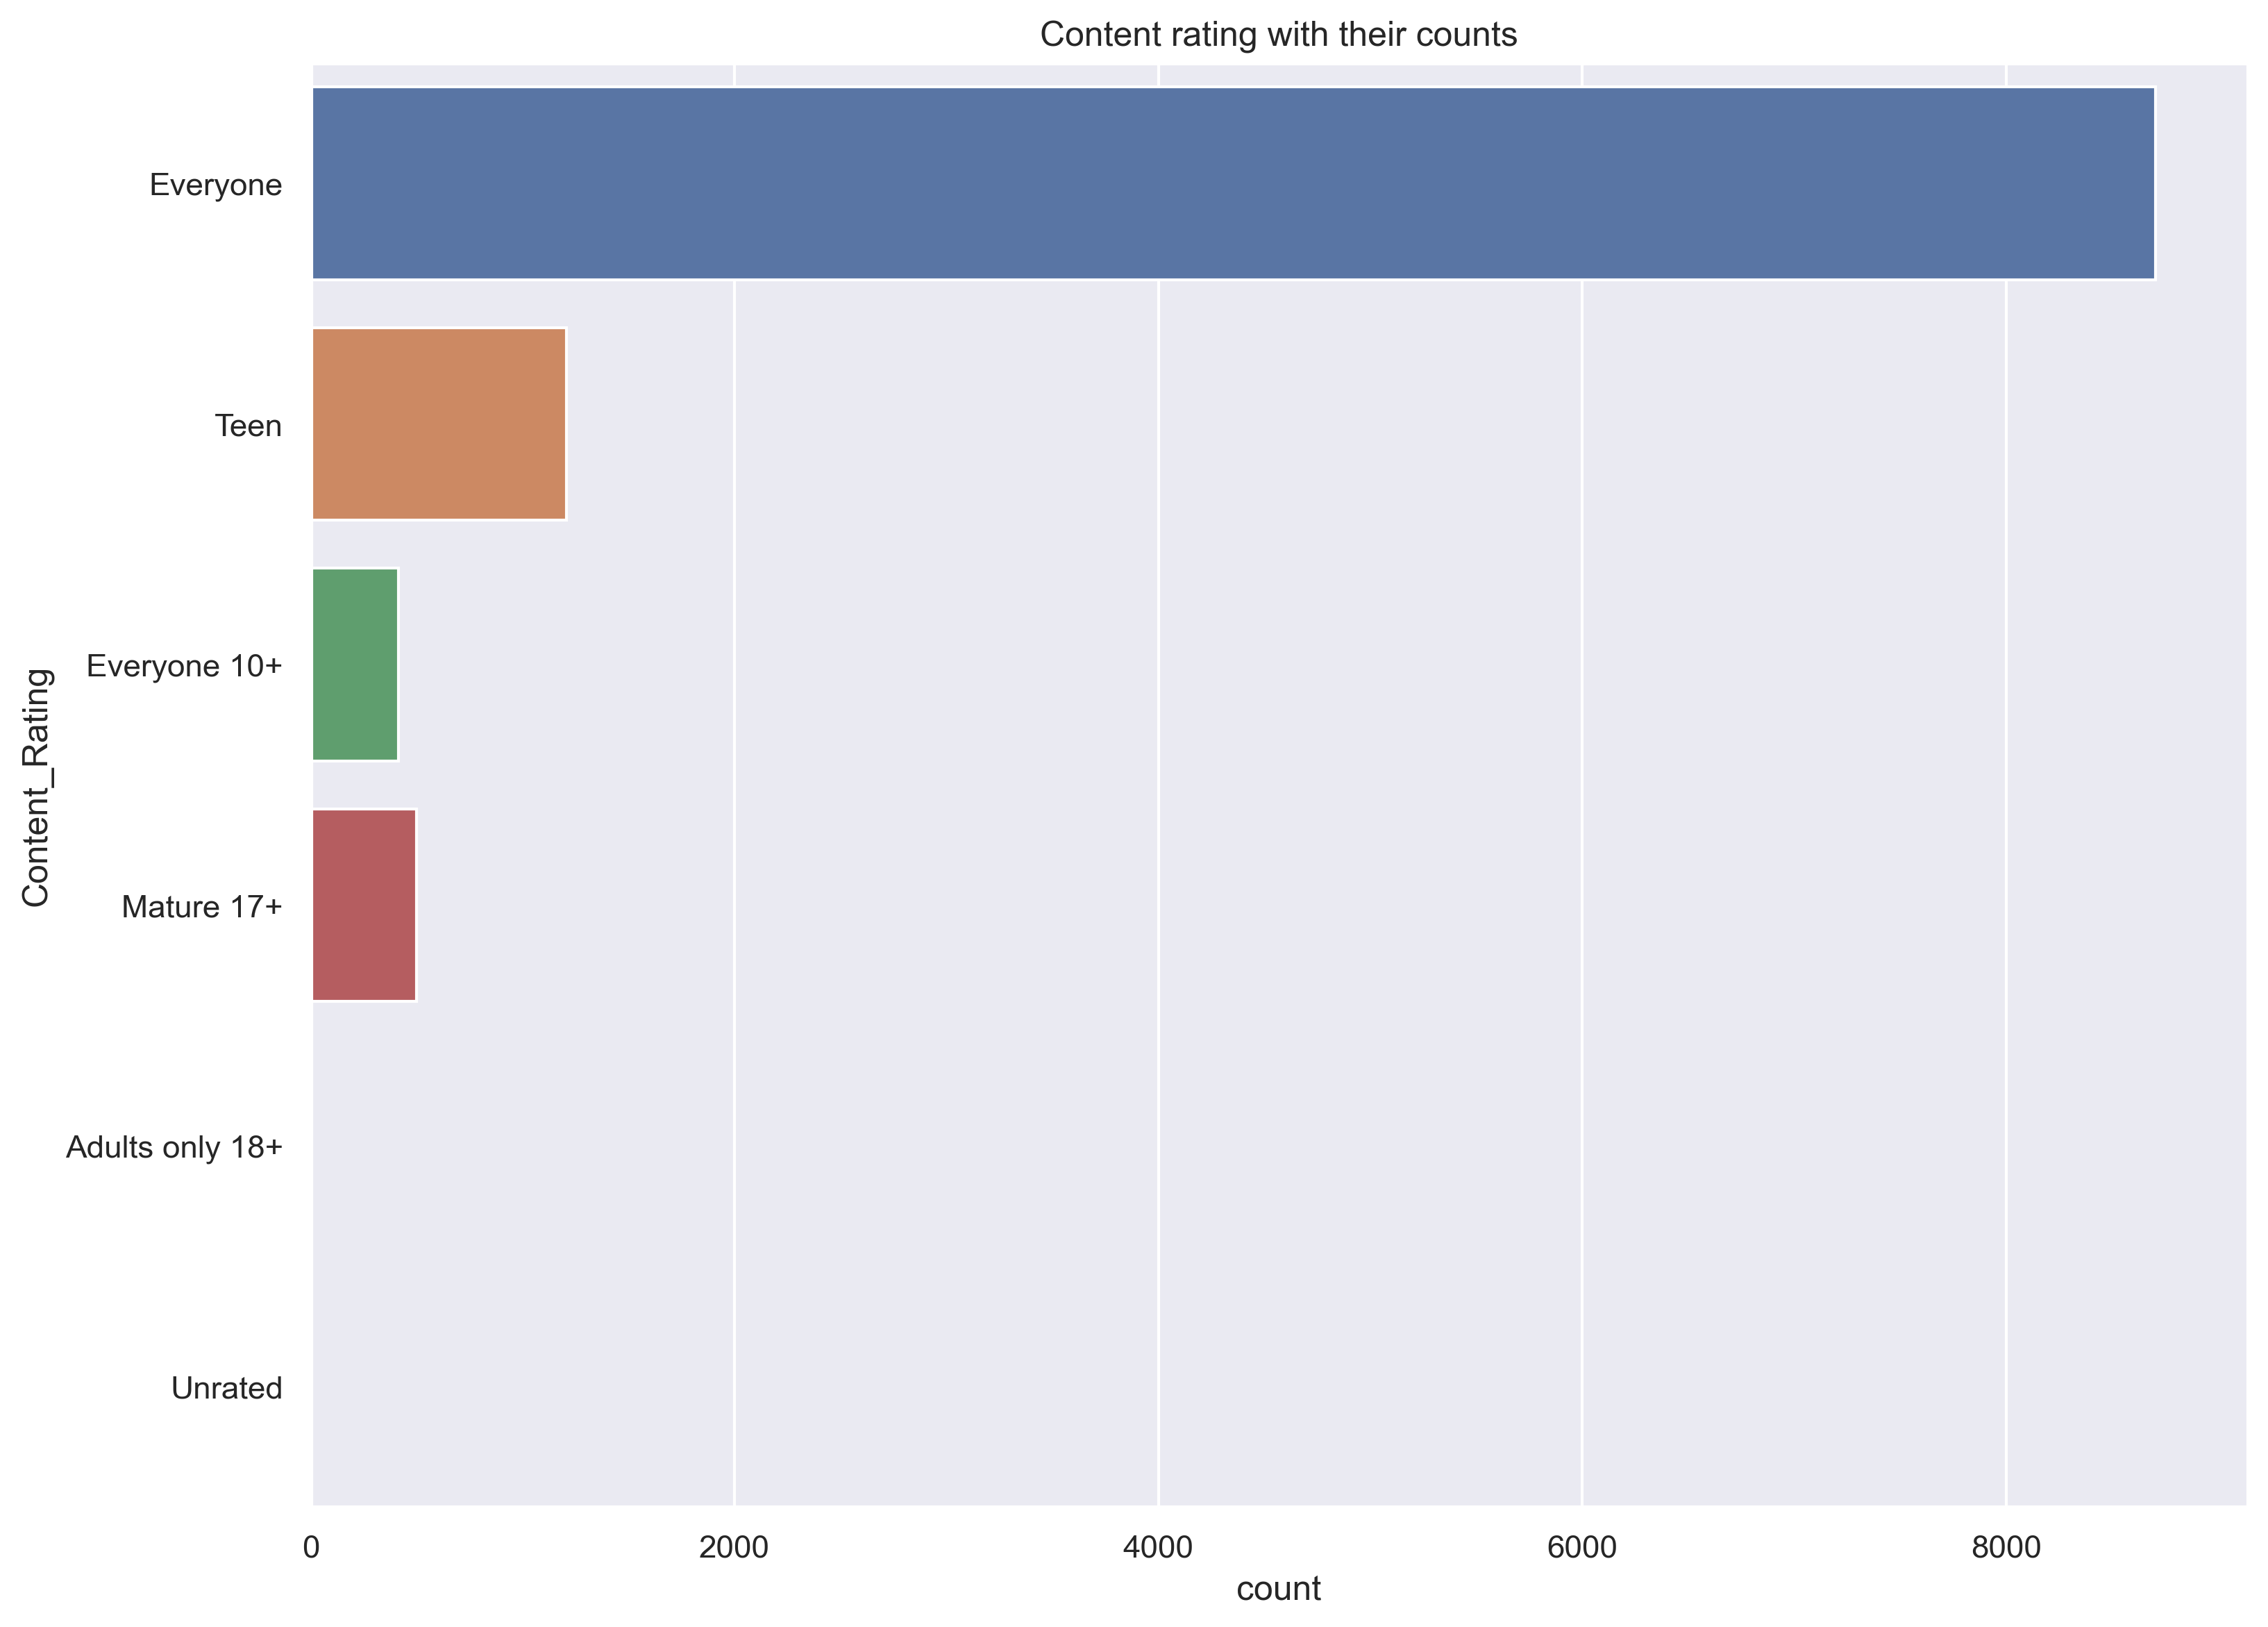

In [115]:
sns.countplot(y = "Content_Rating" , data = data)
plt.title("Content rating with their counts")

<Axes: xlabel='Content_Rating', ylabel='Rating'>

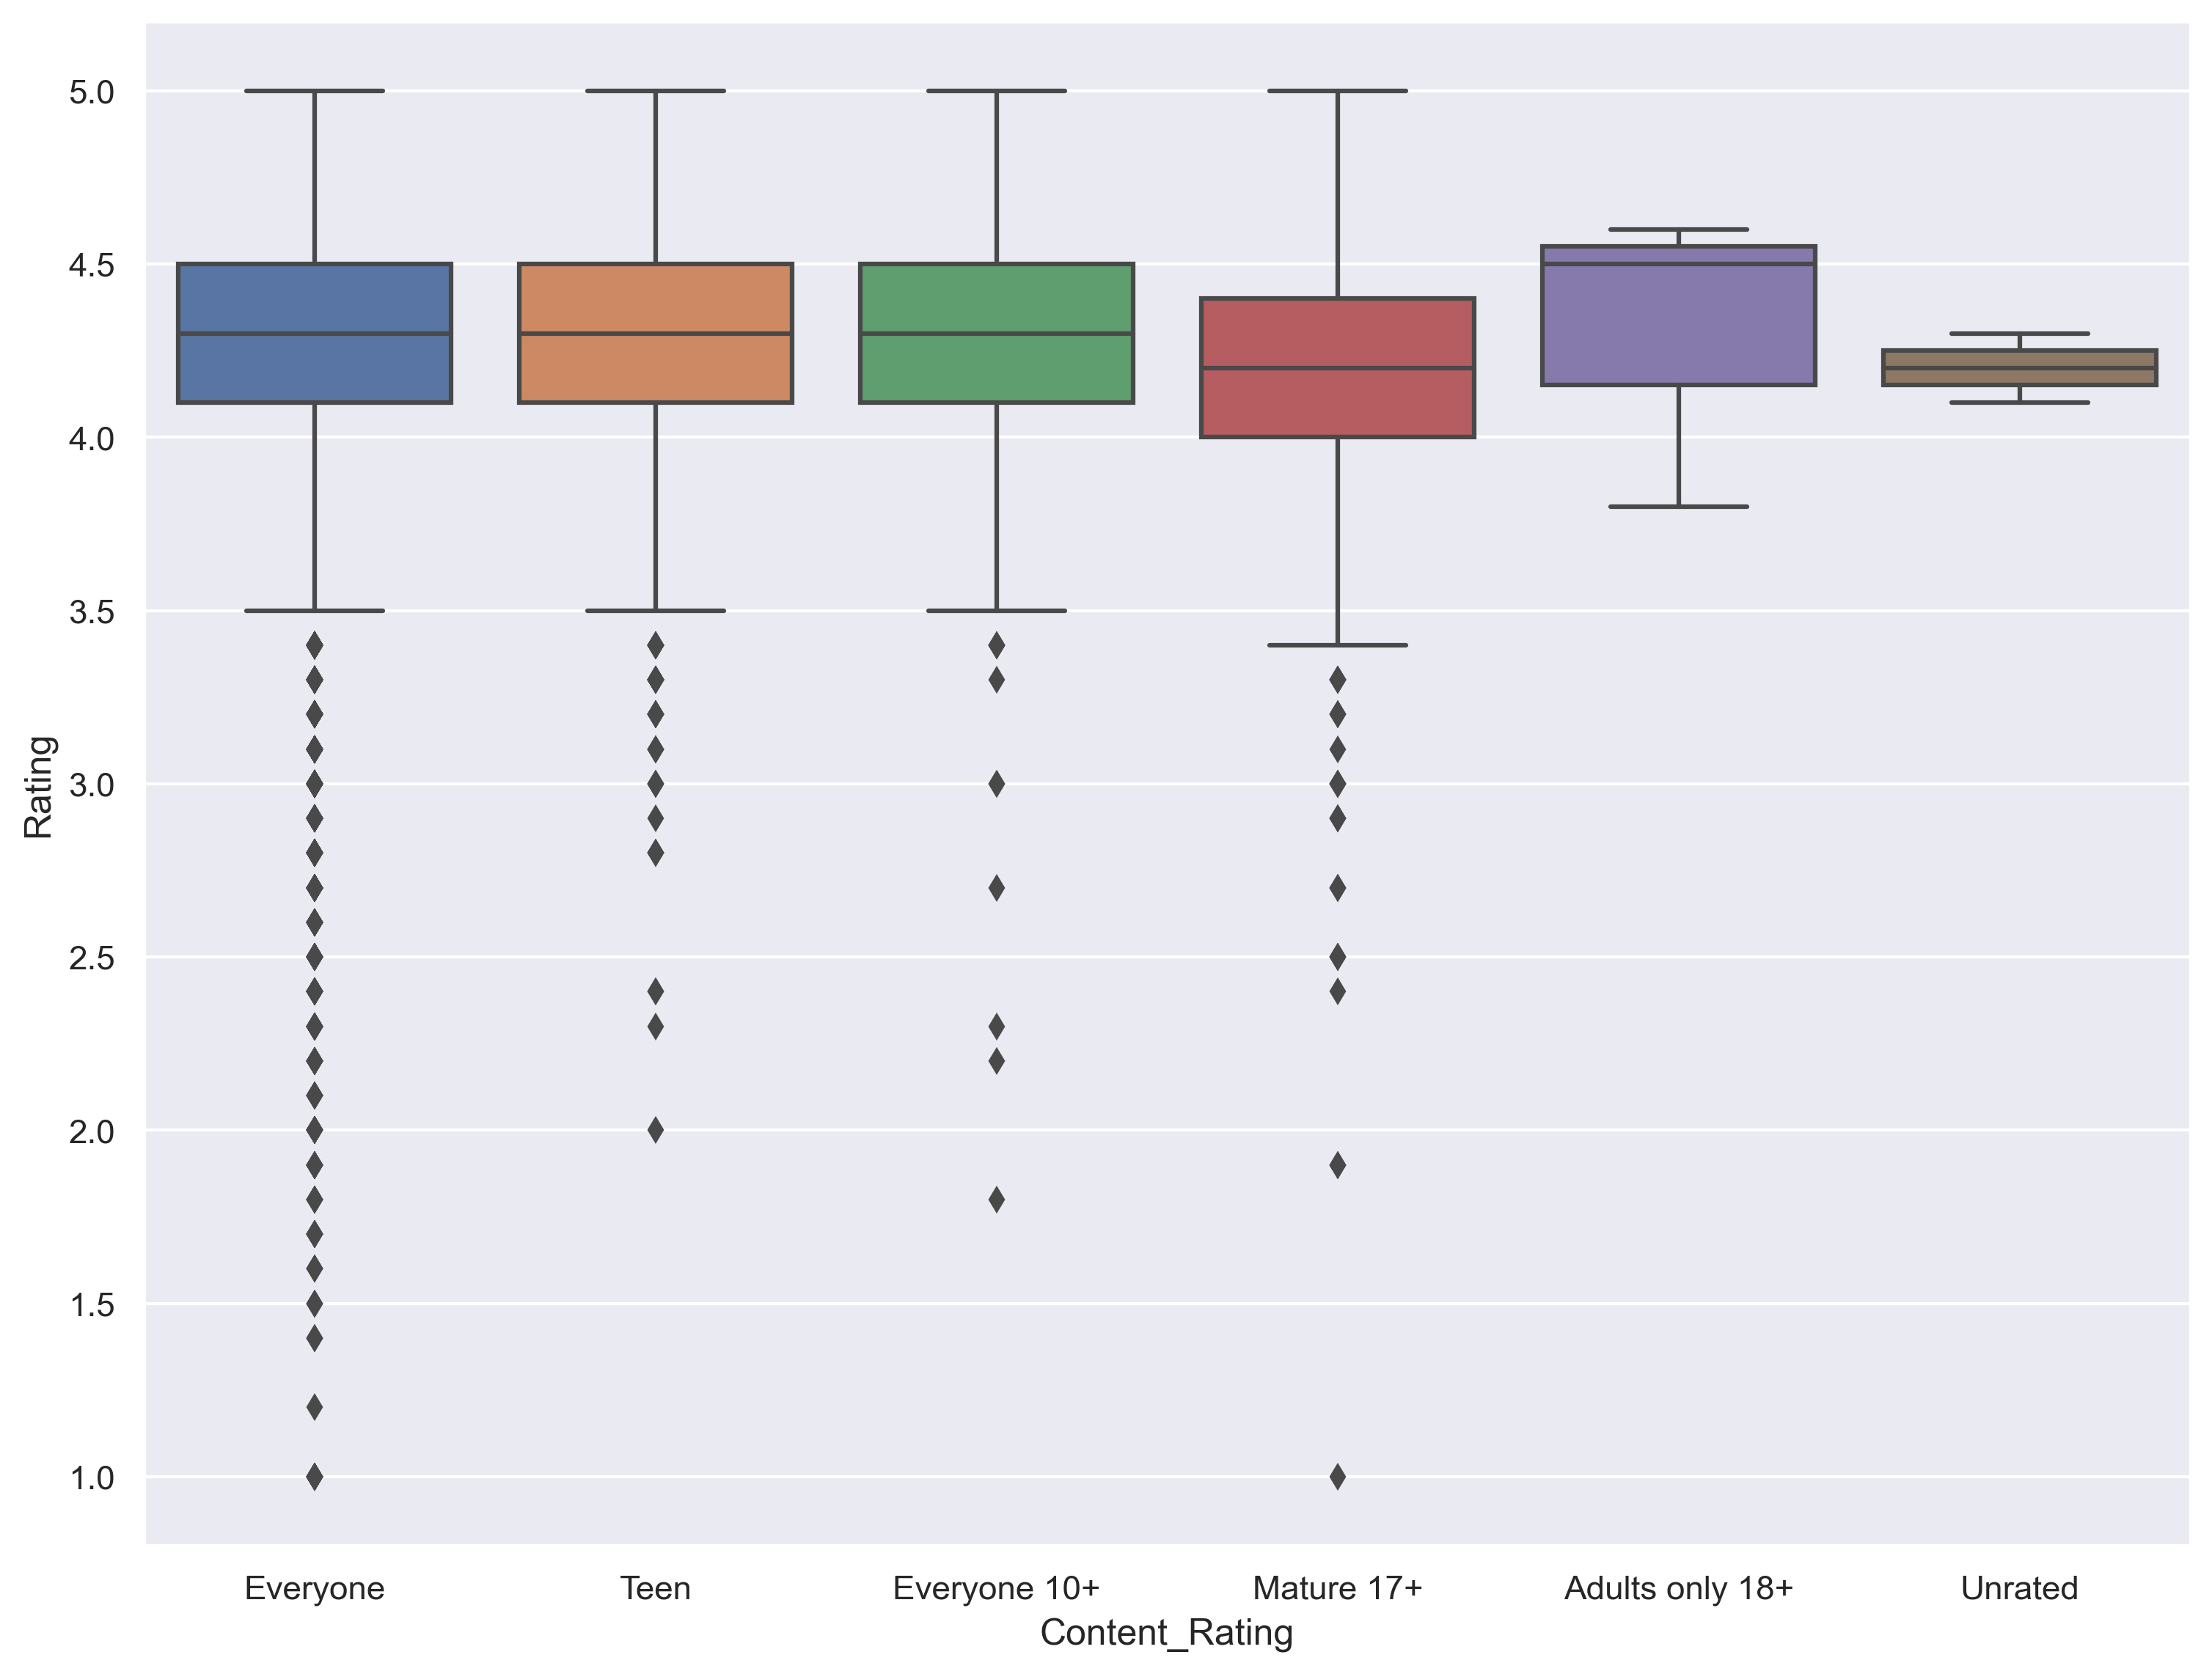

In [116]:
sns.boxplot(x = "Content_Rating" , y = "Rating" , data = data)

Text(0.5, 1.0, 'The number of categories')

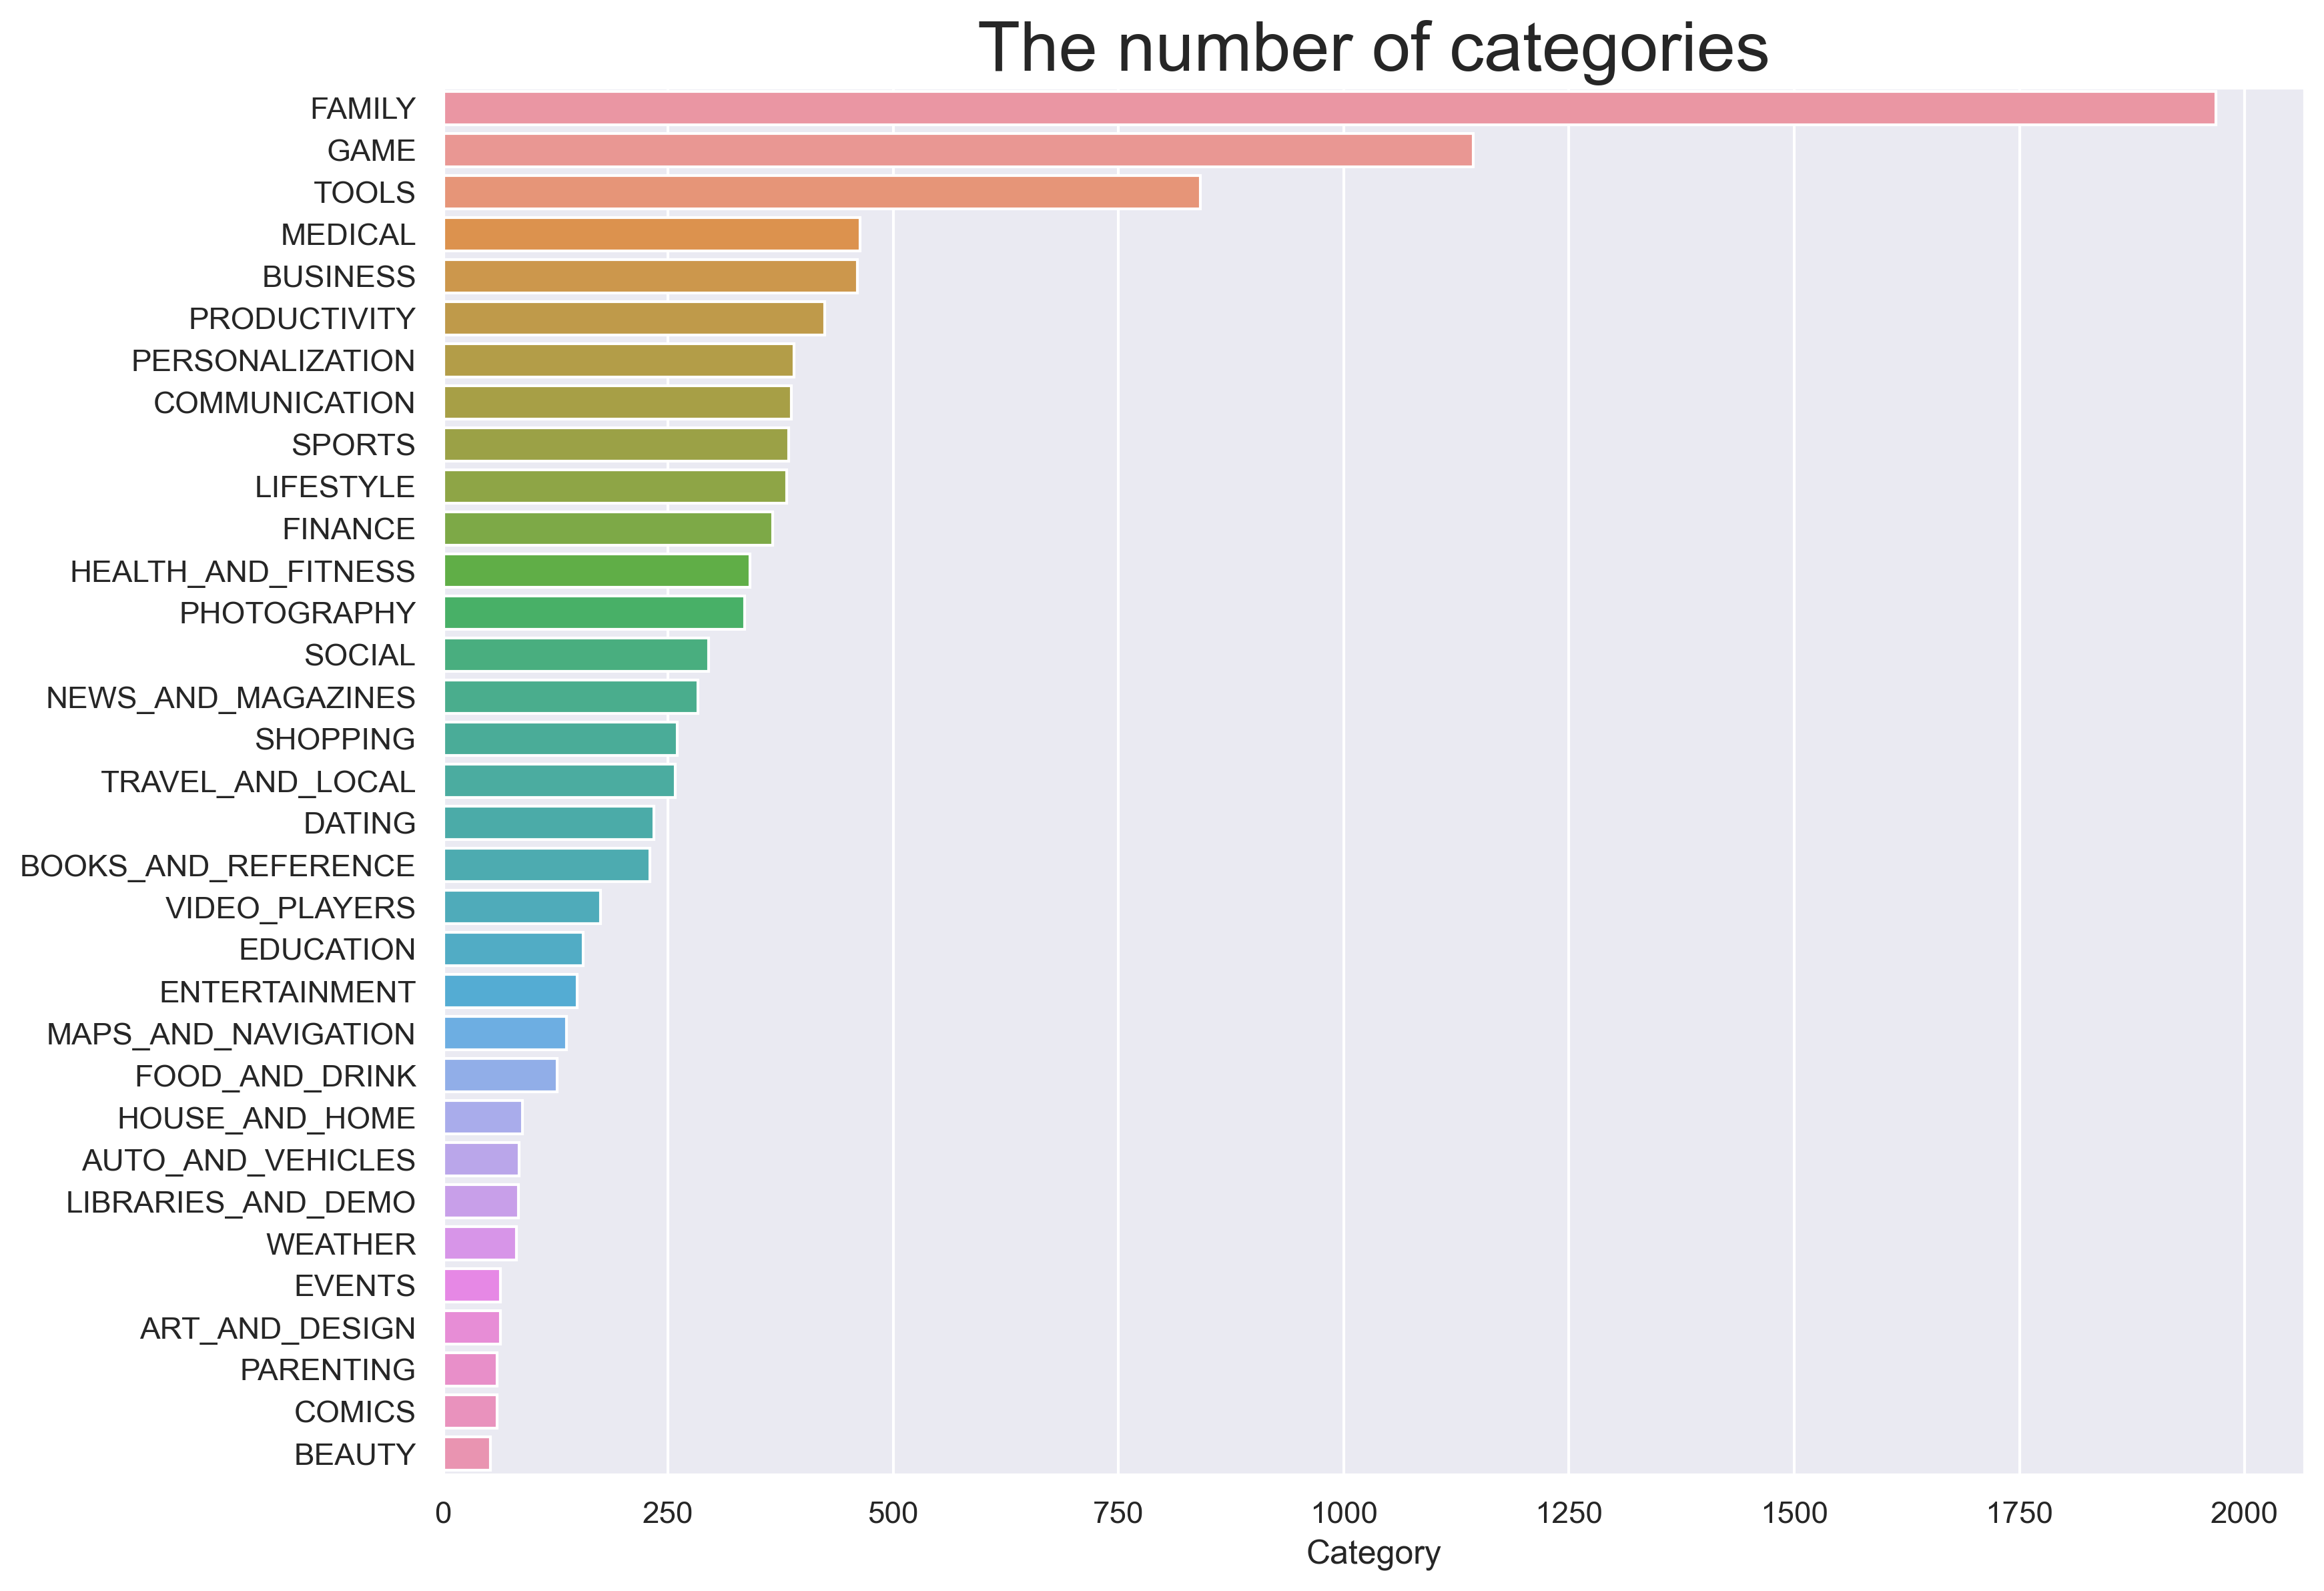

In [121]:
cat_num = data.Category.value_counts()
sns.barplot(x = cat_num , y = cat_num.index , data = data)
plt.title("The number of categories" , size = 25)

<Axes: xlabel='Price', ylabel='Category'>

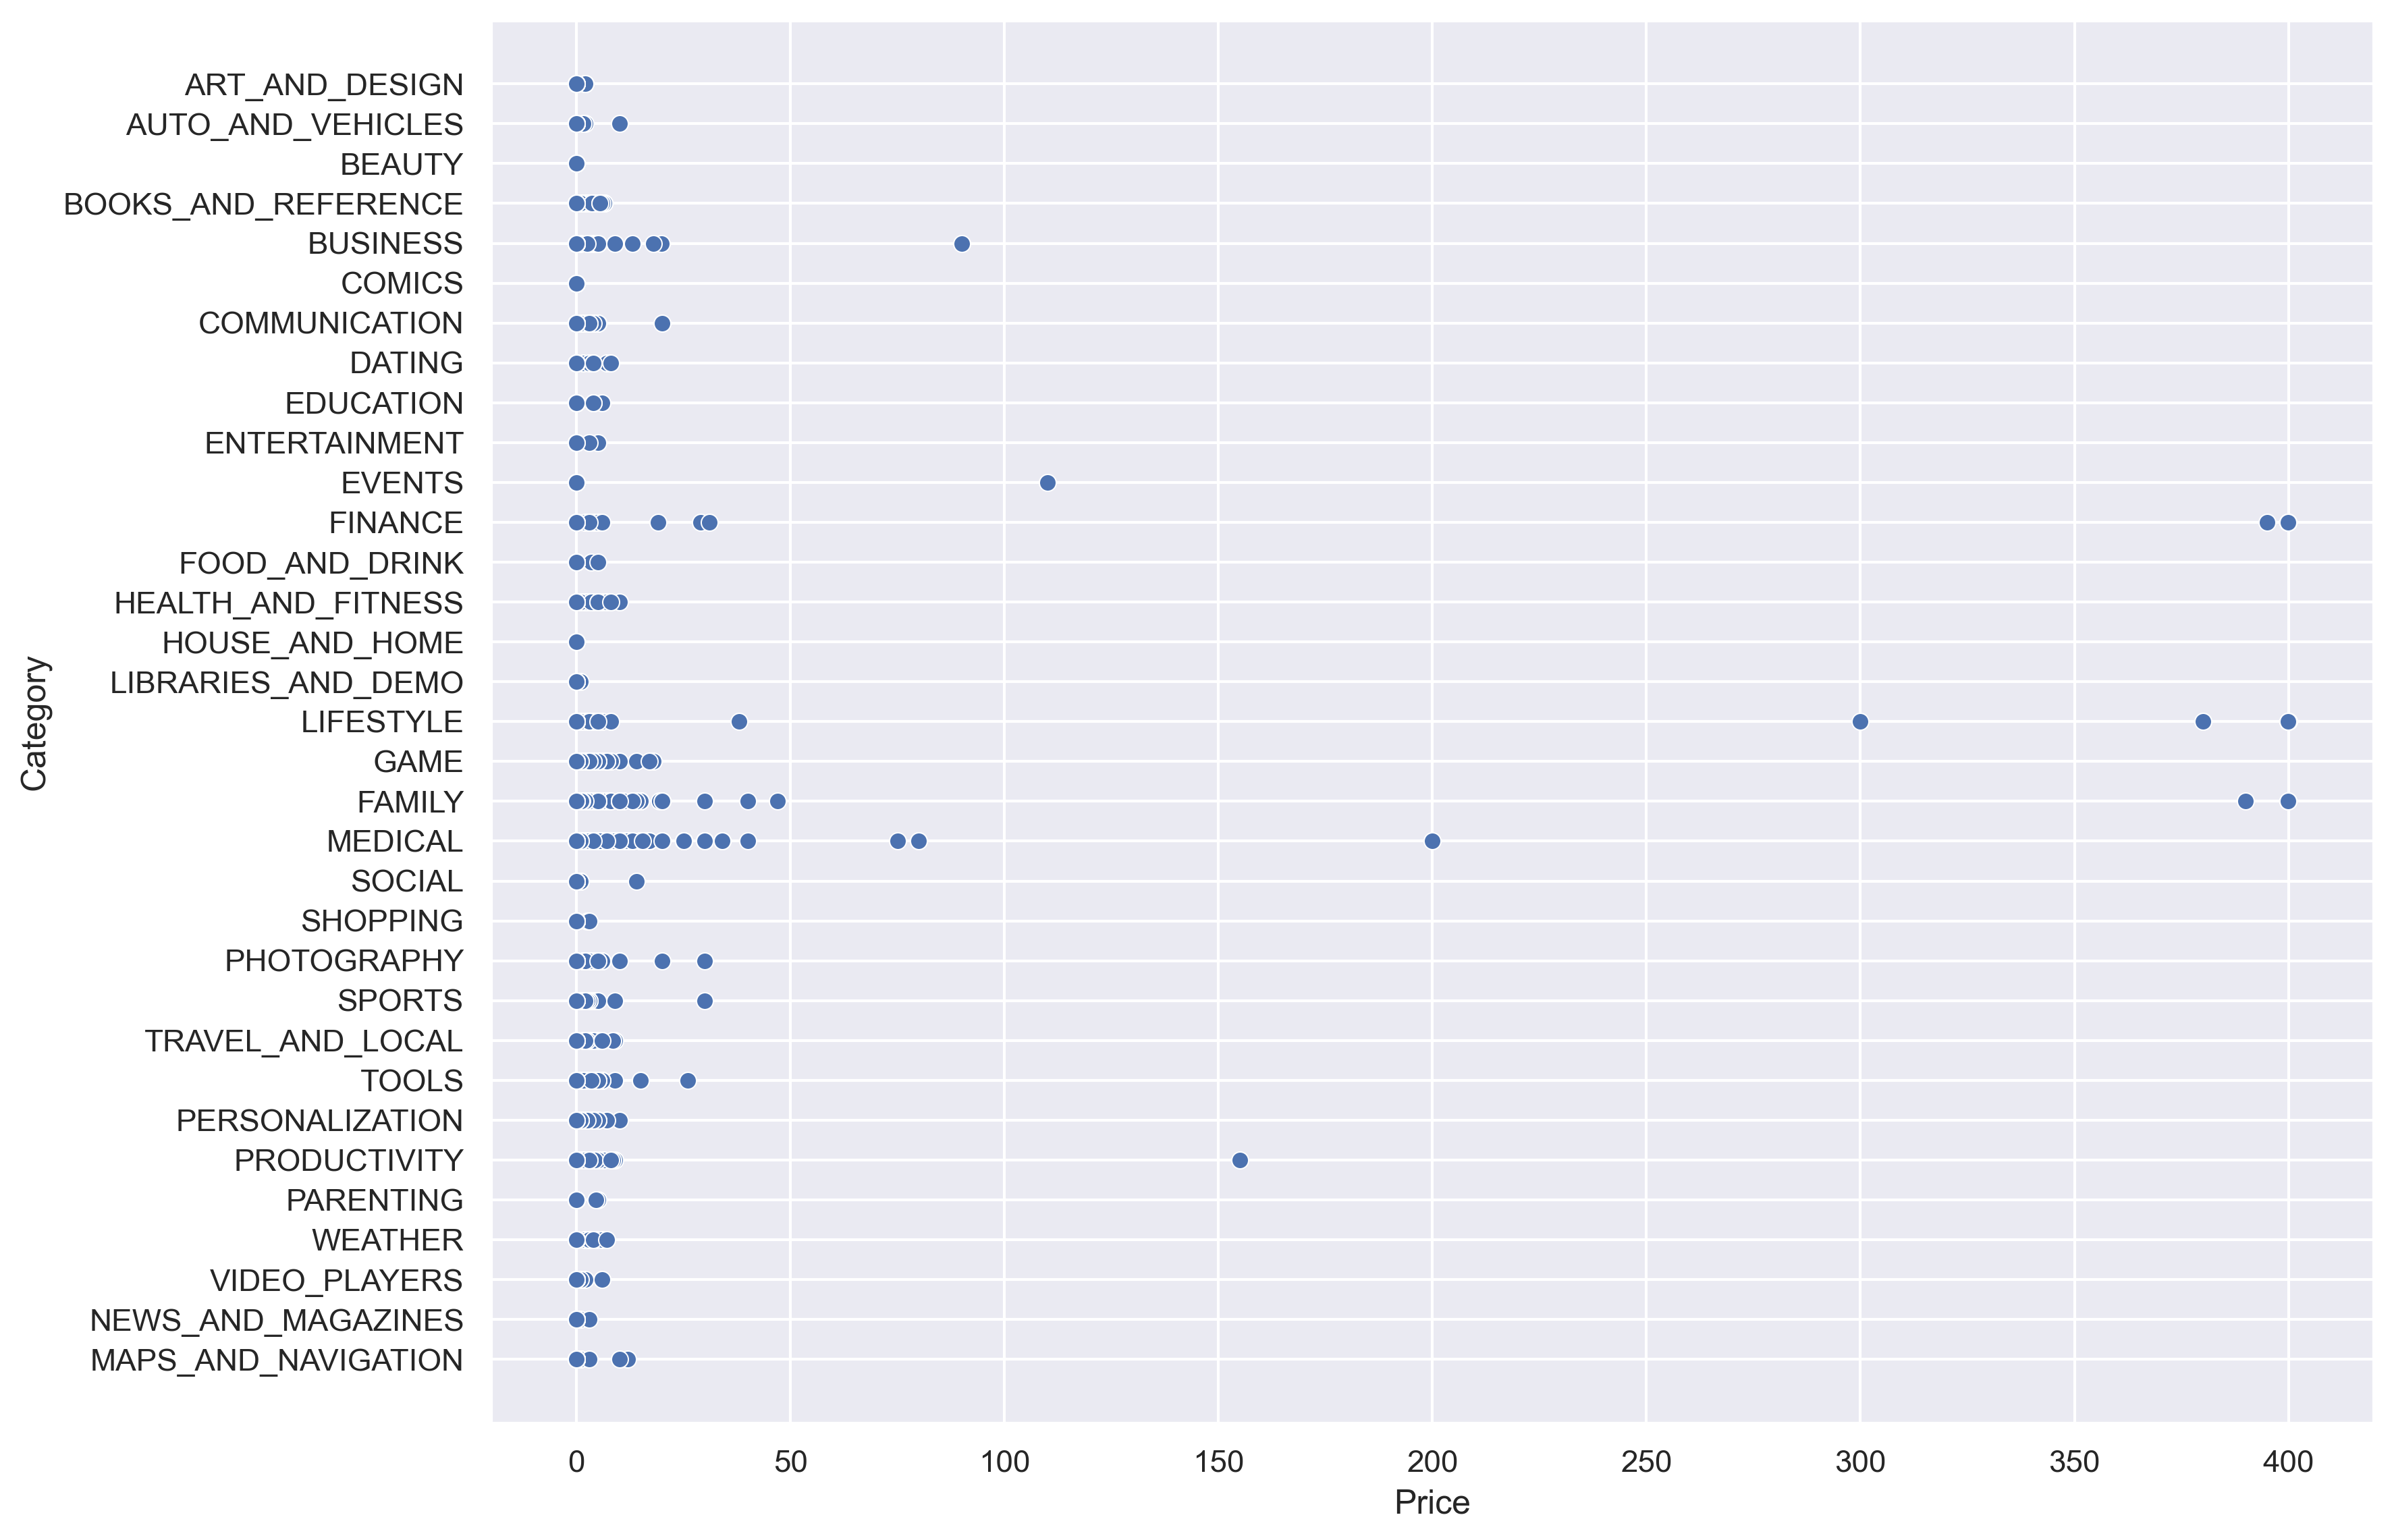

In [123]:
sns.scatterplot(data = data , x = data.Price , y = data.Category)

C:\Users\mucar\AppData\Local\Temp\ipykernel_5508\3552789876.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, linewidths=.5 , fmt=".2f")


<Axes: >

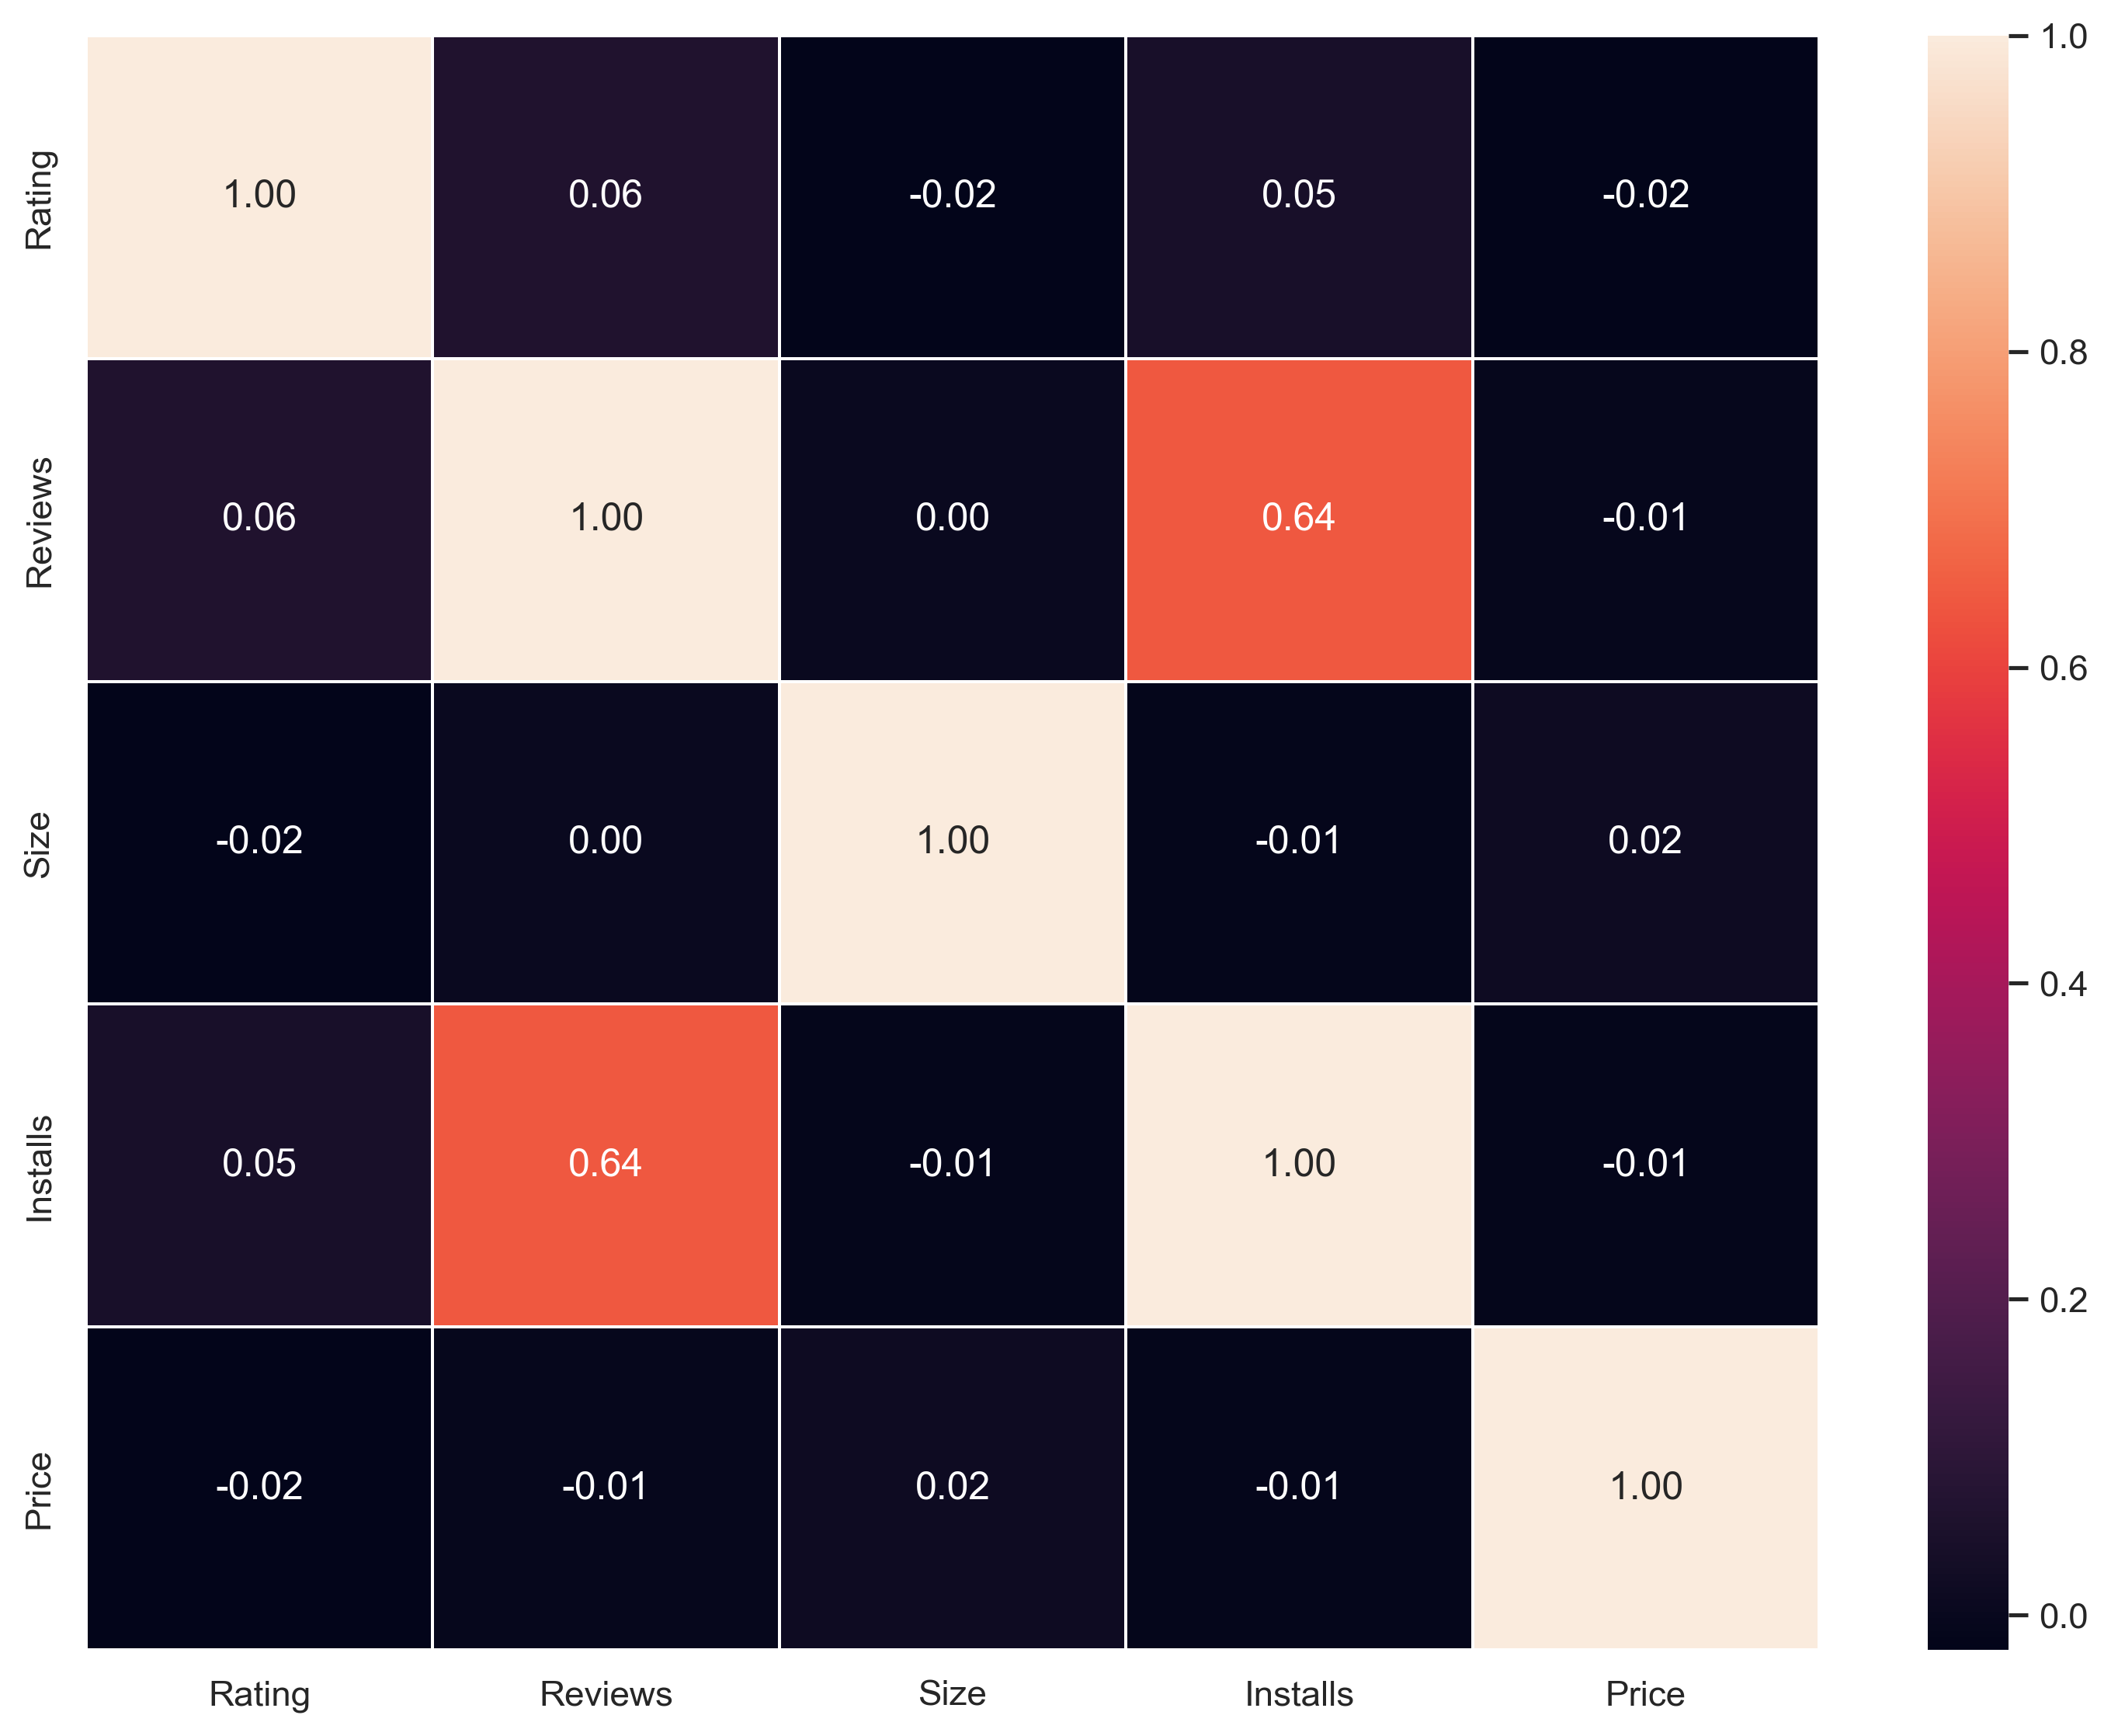

In [125]:
sns.heatmap(data.corr(), annot = True, linewidths=.5 , fmt=".2f")

<Axes: xlabel='Rating', ylabel='Count'>

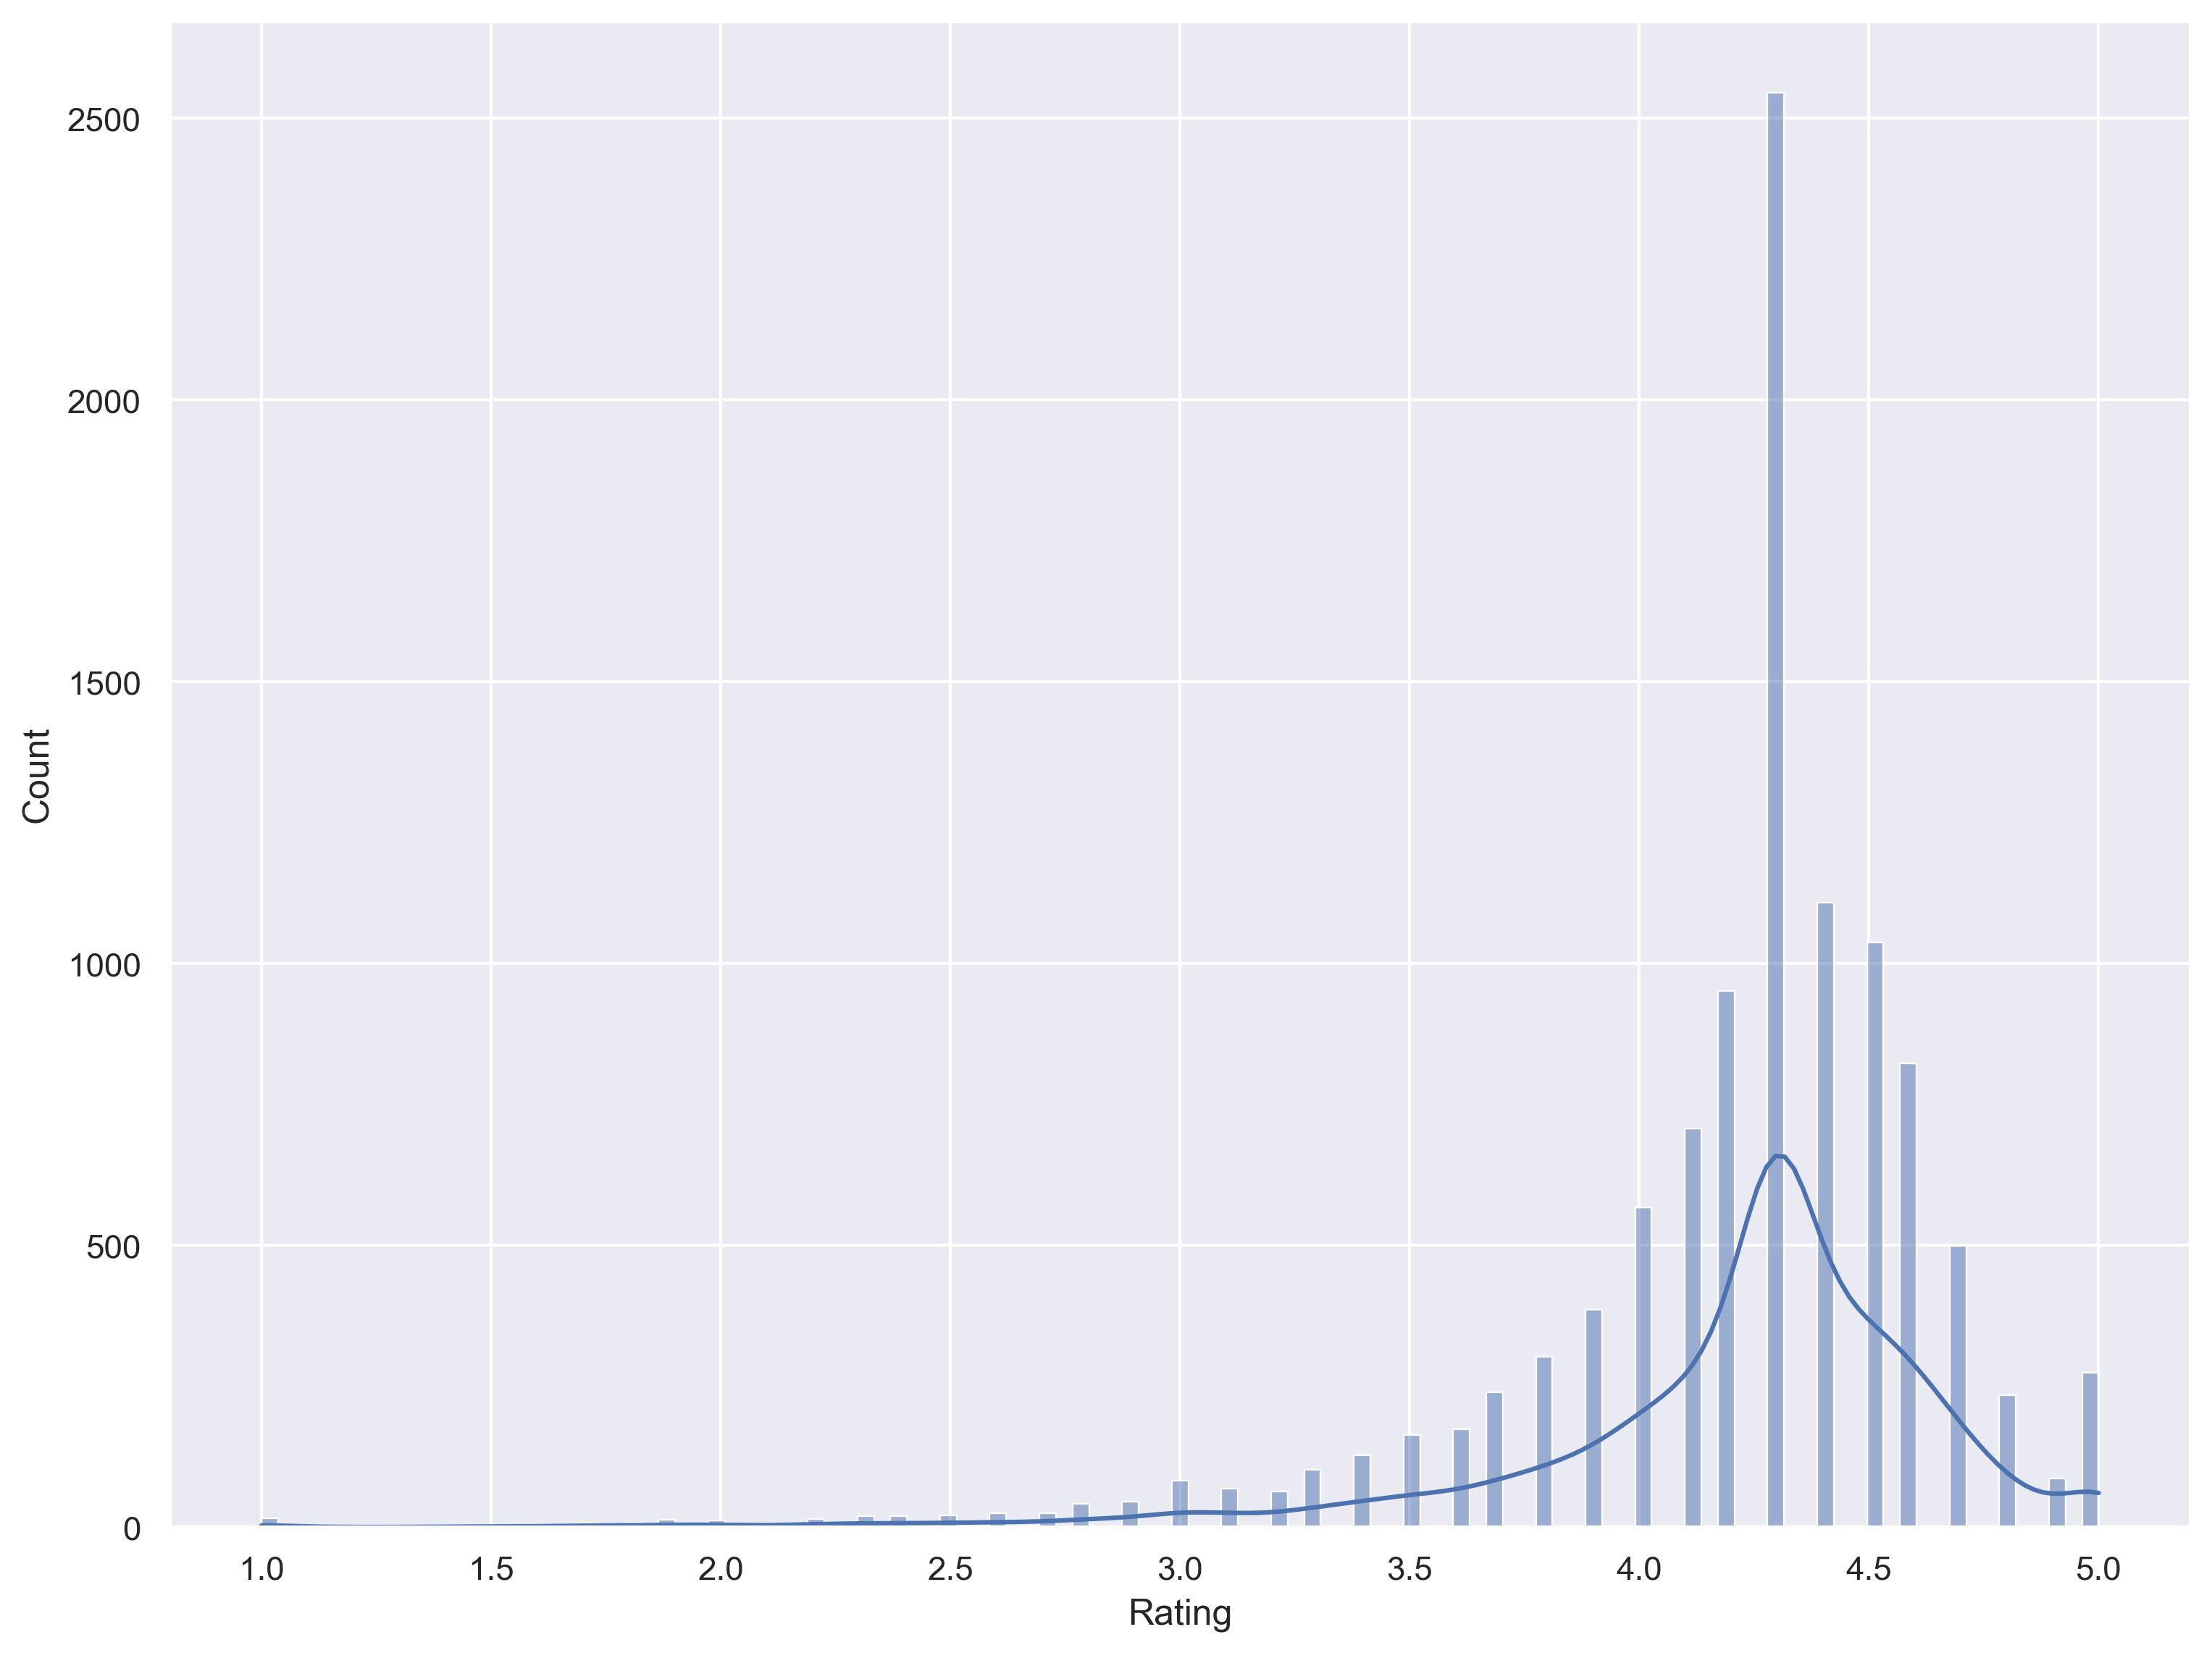

In [126]:
sns.histplot(data.Rating , kde = True)

In [140]:
from wordcloud import WordCloud


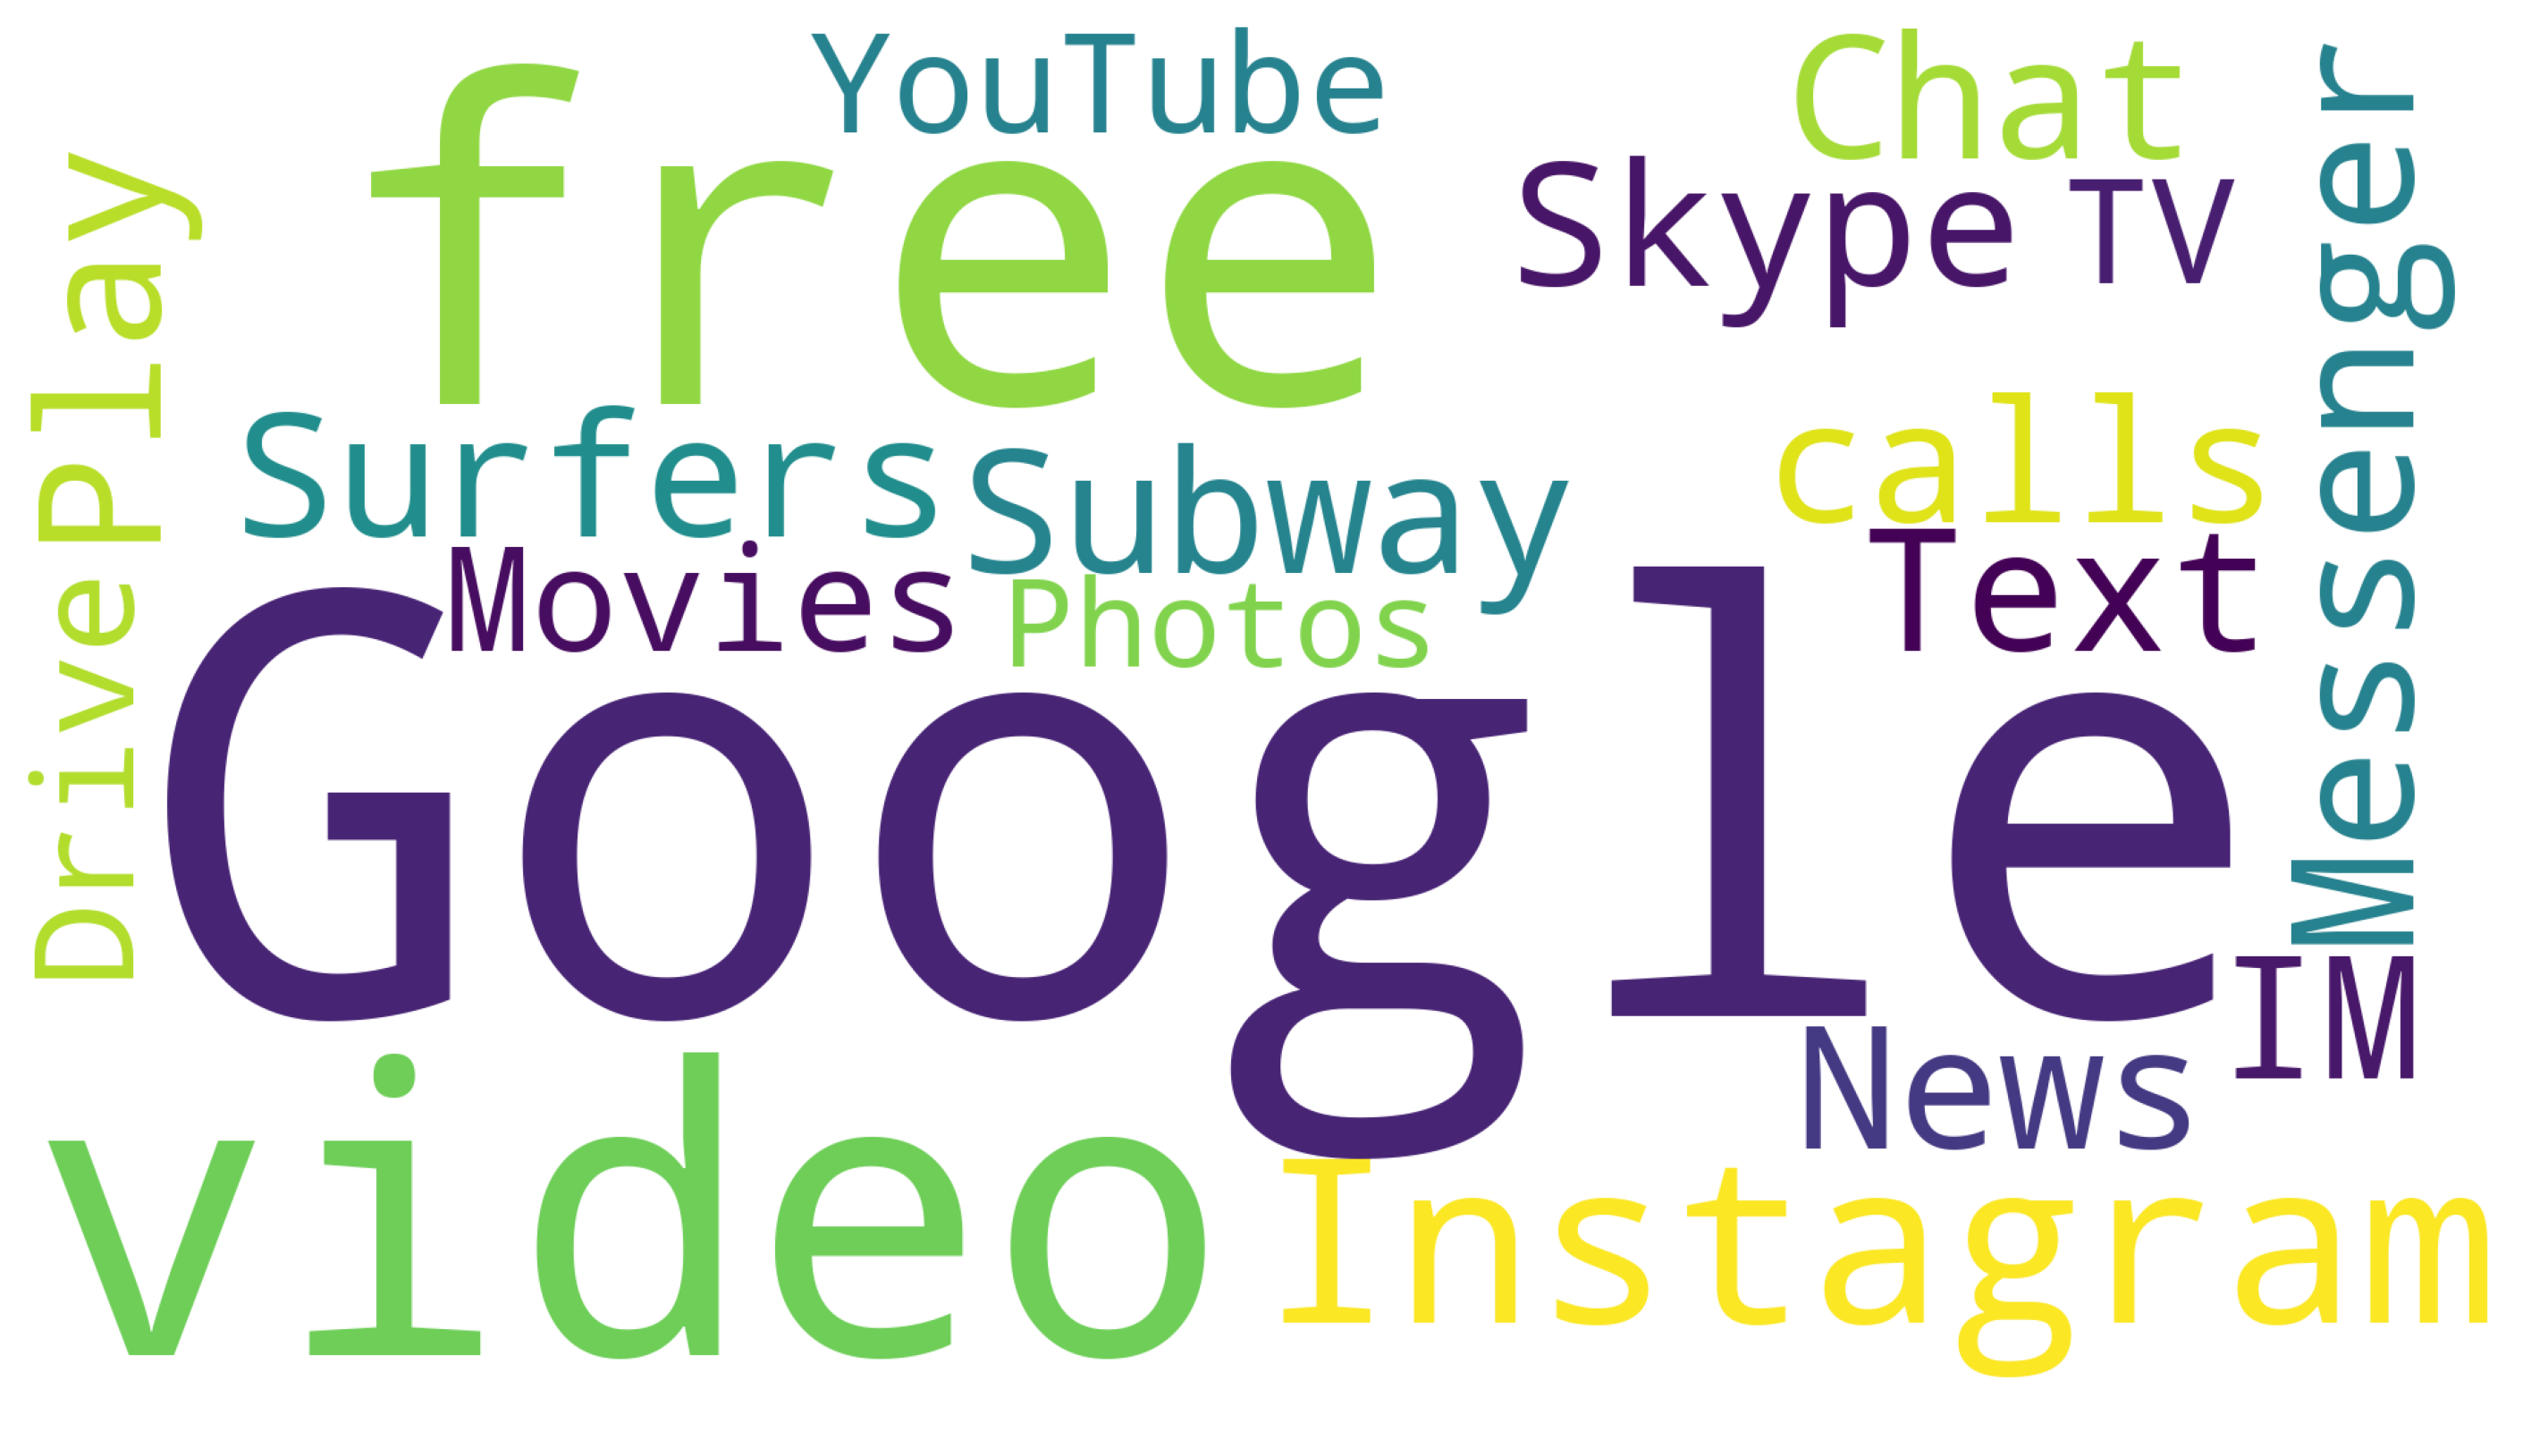

In [141]:
sorted_data = data.sort_values(by="Installs", ascending=False)


most_downloaded_apps = sorted_data.head(10)["App"].values.tolist()


text = " ".join(most_downloaded_apps)

wordcloud = WordCloud(width=1920, height=1080, background_color="white").generate(text)

plt.imshow(wordcloud)
plt.axis("off")


plt.savefig("Most Popular Apps.png", dpi=300, bbox_inches="tight")
